# 0. Konfiguration der Arbeitsumgebung
**Hinweis zur Ausführung:**

Bevor Sie mit dem Ausfüllen des Protokolls beginnen, stellt diese Zelle sicher, dass alle notwendigen Software-Bibliotheken installiert und verfügbar sind. Diese sogenannten „Pakete“ (z. B. `ipywidgets` für die interaktiven Eingabefelder) sind erforderlich, damit das Notebook korrekt funktioniert.

**Was in dieser Zelle passiert:**
- Es wird geprüft, ob alle benötigten Pakete bereits in Ihrer Jupyter-Umgebung installiert sind.
- Falls ein Paket fehlt, wird es automatisch installiert.
- Dies funktioniert unabhängig davon, ob Sie mit Anaconda (Windows) oder venv (macOS/Linux) arbeiten.

**Was Sie tun müssen:**
- Führen Sie diese Zelle **einmalig aus**, bevor Sie mit dem Protokoll arbeiten.
- Es ist **keine manuelle Installation** in der Konsole notwendig.
- Falls eine Installation erfolgt, kann es kurz dauern – warten Sie bitte, bis die Zelle vollständig durchgelaufen ist.

**Hinweis:** Falls Sie das Notebook ohne Internetverbindung verwenden, können fehlende Pakete nicht nachgeladen werden.

**Führen Sie jetzt die folgende Zelle aus:**

In [53]:
import sys
import subprocess

# Benötigte Pakete
pakete = ["numpy", "pandas", "matplotlib", "tabulate", "prettytable", "ipywidgets", "requests", "coolprop"]

installiert = 0
fehler = []

# Pakete prüfen und installieren
for paket in pakete:
    try:
        __import__(paket)
    except ImportError:
        try:
            print(f"Installiere {paket}...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", paket], 
                                 stdout=subprocess.DEVNULL)
            installiert += 1
        except:
            fehler.append(paket)

# Pakete importieren
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import ipywidgets as widgets
import requests, json, os
from CoolProp.CoolProp import PropsSI

# Status anzeigen
if fehler:
    print(f"FEHLER bei: {', '.join(fehler)}")
    print("-> Bitte manuell installieren: pip install <paketname>")
elif installiert > 0:
    print(f"{installiert} Pakete erfolgreich installiert!")
else:
    print("Alle Pakete bereits vorhanden!")

print("Setup abgeschlossen - bereit für das Praktikum!")

Installiere coolprop...
1 Pakete erfolgreich installiert!
Setup abgeschlossen - bereit für das Praktikum!


In [15]:
from IPython.display import display

# --- Konfiguration ---
VERSUCH = "Windkraft"  # ← hier den Versuchsnamen ändern
FILENAME = f"protokoll_{VERSUCH}.json"
FIELD_WIDTH = '500px'
LABEL_WIDTH = '160px'
LOGO_URL = "https://thga.sciebo.de/s/PMFfmxdyEcrEr3P/download"

# --- Felder und Standarddaten ---
fields = {
    "Name": "",
    "Matrikelnummer": "",
    "Gruppe": "",
    "Versuchstag": "",
    "Praktikumsleitung": ""
}

# --- Daten aus Datei laden ---
if os.path.exists(FILENAME):
    with open(FILENAME, "r") as f:
        fields.update(json.load(f))

# --- Logo laden ---
try:
    resp = requests.get(LOGO_URL)
    logo = widgets.Image(
        value=resp.content, format='png',
        layout=widgets.Layout(width='200px', height='auto')
    ) if resp.status_code == 200 else widgets.Label("Logo nicht verfügbar.")
except:
    logo = widgets.Label("Logo konnte nicht geladen werden.")

# --- Überschriftsteil ---
headings = widgets.VBox([
    widgets.HTML(f'<div style="font-size: 20pt; font-weight: bold;">Protokoll zum Versuch: {VERSUCH.capitalize()}</div>'),
    widgets.HTML(f'<div style="font-size: 14pt;"><strong>Praktikum:</strong> Regenerative Energien II</div>'),
    widgets.HTML(f'<div style="font-size: 14pt;"><strong>Semester:</strong> Wintersemester 2025/26</div>')
], layout=widgets.Layout(align_items='flex-start', gap='2px'))

header = widgets.HBox([headings, logo],
                      layout=widgets.Layout(justify_content='space-between', align_items='flex-start'))

# --- Formularfelder anlegen ---
widgets_dict = {
    key: widgets.Text(value=fields[key], layout=widgets.Layout(width=FIELD_WIDTH))
    for key in fields
}

def labeled_row(label, widget):
    return widgets.HBox([
        widgets.Label(label + ":", layout=widgets.Layout(width=LABEL_WIDTH)),
        widget
    ])

form = widgets.VBox([labeled_row(k, widgets_dict[k]) for k in fields])

# --- Speichern ---
def save_to_json(_):
    data = {k: w.value for k, w in widgets_dict.items()}
    with open(FILENAME, "w") as f:
        json.dump(data, f)
    print(f"Daten gespeichert in '{FILENAME}'.")

save_button = widgets.Button(description="Speichern", button_style='success')
save_button.on_click(save_to_json)

# --- Anzeige ---
display(header, widgets.HTML("<hr>"), form, save_button)

HTML(value='<hr>')

Button(button_style='success', description='Speichern', style=ButtonStyle())

# 1. Einleitung
**Hinweis zur Bearbeitung:**

Bevor Sie mit dem Versuch beginnen, formulieren Sie bitte eine kurze Einleitung. Beschreiben Sie in eigenen Worten die grundlegenden physikalischen Prinzipien der Windenergienutzung und das Wissen, das benötigt wird, um dieses Protokoll nachvollziehen zu können.


 **Denkanstöße für Ihre Einleitung:**
- Wie entsteht Wind und welche globalen sowie lokalen Faktoren beeinflussen ihn?
- Welche physikalischen Größen sind für die Umwandlung von Windenergie in elektrische Energie relevant?
- Wie ist eine moderne Windkraftanlage aufgebaut und wie funktioniert sie?
- Was unterscheidet Anlagen mit horizontaler und vertikaler Drehachse?
- Welche Rolle spielt der Auftrieb an Rotorblättern bei der Energieerzeugung?
- Welche Bedeutung hat die Windenergie in der Energiewende?
- In welchen geografischen Regionen ist Windenergie besonders effizient nutzbar?
- Welche praktischen Anwendungen und aktuellen Entwicklungen der Windkraft kennen Sie?

 **Tragen Sie Ihre eigene Einleitung im folgenden Feld ein:**

# 2. Durchführung und Auswertung

## 2.1 Versuch 1: U-I-Kennlinie und Leistung verschiedener Rotorbauarten und Blattformen

In diesem Versuch werden verschiedene Rotoren (3-Blatt, 4-Blatt und Savonius) verwendet, um das Verhalten bei unterschiedlichen Rotorbauarten zu untersuchen. Ziel ist es, die Auswirkungen auf Stromstärke $( I )$, Spannung $( U )$, Leistung $( P )$ und Drehzahl $( D )$ zu erfassen.

Die Rotoren werden durch ein Winderzeugermodul mit einstellbarer Netzspannung (9 V) angetrieben. Die Messungen erfolgen mit einem AV-Modul und einem Drehzahlmessgerät.

---

**Aufbau, Geräte & Komponenten:**
- Grundeinheit  
- Winderzeugermodul  
- Windgeneratormodul (3- und 4-Flügler, optimiertes Profil)  
- Savoniusrotormodul  
- Potentiometermodul  
- AV-Modul  
- Drehzahlmessgerät  
- Power-Modul (9 V)

---

**Schaltplan:**

![Schaltplan Versuch1.1](Data/Schaltplan_Wind_Versuch_1.png "Schaltplan")

---

**Durchführung**

1. Bauen Sie den Versuchsplan mit dem 3-Blatt-Rotor (optimiertes Profil) auf.
   1. Stellen Sie eine Netzspannung von $U_\text{Netz} = 9\ \text{V}$ ein.
   2.  Messen Sie die Spannung $U$, Stromstärke $I$ und Drehzahl $d$ bei verschiedenen Potentiometerstellungen. Beginnen Sie bei der höchsten Spannung und verringern Sie diese in Schritten von ca. $0{,}2\ \text{V}$.
2. Wiederholen Sie den Versuch mit dem 4-Blatt-Rotor (optimiertes Profil).
3. Wiederholen Sie den Versuch mit dem Savoniusrotor. Verringern Sie die Spannung diesmal in Schritten von ca. $0{,}1\ \text{V}$.

---

**Messgrößen:**  
- Die elektrische Spannung $U$ in $\text{[V]}$  
- Die Stromstärke $I$ in $\text{[mA]}$  
- Die Leistung $P = U \cdot I$ in $\text{[mW]}$  
- Die Drehzahl $D$ in $\text{[min}^{-1}\text{]}$  

---

**Messdaten:**

Notieren Sie hier Ihre Messdaten in einfachen Listen. Nutzen Sie dafür eindeutige Bezeichnungen, ähnlich wie im folgenden Beispiel:

In [17]:
# DATENERFASSUNG - NUR MESSWERTE EINTRAGEN!

# Messwerte für 3-Blatt-Rotor (optimiertes Profil)
u_3blatt = [3.77, 3.58, 3.35, 3.17, 2.99, 2.80, 2.61, 2.28, 2.08, 1.85, 1.40, 1.23, 1.05, 0.67, 0.188]          # Spannung in V
i_3blatt = [4.00, 11.70, 20.10, 26.80, 35.20, 42.90, 50.50, 62.00, 69.70, 77.50, 90.00, 95.50, 99.30, 95.20, 27.30]  # Strom in mA
D_3blatt = [4860, 4731, 4556, 4468, 4359, 4238, 4106, 3842, 3736, 3515, 3206, 3052, 2884, 2302, 599]              # Drehzahl in 1/min        # Drehzahl in 1/min

# Messwerte für 4-Blatt-Rotor (optimiertes Profil) 
u_4blatt = [3.66, 3.50, 3.30, 3.08, 2.89, 2.70, 2.50, 2.31, 2.07, 1.82, 1.64, 1.37, 1.03, 0.84]  # Spannung in V
i_4blatt = [3.90, 11.40, 20.30, 31.80, 39.50, 43.50, 56.50, 64.70, 74.60, 85.60, 93.00, 103.60, 116.60, 123.20]  # Strom in mA
D_4blatt = [4712, 4627, 4529, 4411, 4308, 4253, 4080, 3980, 3831, 3671, 3556, 3385, 3147, 3015]  # Drehzahl in 1/min       # Drehzahl in 1/min

# Messwerte für 3-Blatt-Rotor (flaches Profil)
u_3flach = [1.26, 1.01, 0.807, 0.607, 0.38, 0.261]  # Spannung in V
i_3flach = [1.90, 14.70, 23.30, 30.30, 35.40, 37.50]  # Strom in mA
D_3flach = [1608, 1471, 1336, 1173, 965, 835]        # Drehzahl in 1/min

# Messwerte für Savonius-Rotor
u_savonius = [0.53, 0.43, 0.33, 0.22, 0.133]  # Spannung in V
i_savonius = [1.30, 5.90, 10.30, 14.80, 18.80]  # Strom in mA
D_savonius = [663, 615, 575, 522, 487]         # Drehzahl in 1/min

print("Daten erfolgreich geladen!")
print("Verfügbare Datensätze:")
print(f"   - 3-Blatt-Rotor, optimiert:  {len(u_3blatt)} Messpunkte")
print(f"   - 4-Blatt-Rotor:  {len(u_4blatt)} Messpunkte")
print(f"   - 3-Blatt-Rotor, flach:  {len(u_3flach)} Messpunkte")
print(f"   - Savonius-Rotor: {len(u_savonius)} Messpunkte")
print("Bereit für Auswertung in den nächsten Zelle!")

Daten erfolgreich geladen!
Verfügbare Datensätze:
   - 3-Blatt-Rotor, optimiert:  15 Messpunkte
   - 4-Blatt-Rotor:  14 Messpunkte
   - 3-Blatt-Rotor, flach:  6 Messpunkte
   - Savonius-Rotor: 5 Messpunkte
Bereit für Auswertung in den nächsten Zelle!


Aus diesen Messwerten werden nun Tabellen mit `pandas` `DataFrames` erstellt.
Wichtige Hinweise:

- Die Messwerte müssen nicht nochmal eingegeben werden, solange die Zelle mit den Listen zuvor ausgeführt wurde
- Python beginnt die Indexierung bei [0] - der erste Wert hat Index 0, der zweite Index 1, usw.
- DataFrames ermöglichen professionelle Tabellendarstellung und einfache Berechnungen

Im folgenden Code werden alle Listen aus Messdaten in `DataFrames`umgewandelt:

In [30]:
# DATAFRAMES AUS DEN LISTEN ERSTELLEN  

# 3-Blatt-Rotor, optimiert
df_3blatt = pd.DataFrame({
    'U [V]': u_3blatt,
    'I [mA]': i_3blatt,
    'D [1/min]': D_3blatt
})

# 4-Blatt-Rotor
df_4blatt = pd.DataFrame({
    'U [V]': u_4blatt,
    'I [mA]': i_4blatt,
    'D [1/min]': D_4blatt
})

# 3-Blatt-Rotor, flach
df_3flach = pd.DataFrame({
    'U [V]': u_3flach,
    'I [mA]': i_3flach,
    'D [1/min]': D_3flach
})

# Savonius-Rotor
df_savonius = pd.DataFrame({
    'U [V]': u_savonius,
    'I [mA]': i_savonius,
    'D [1/min]': D_savonius
})

# Indizes als "Messpunkte" umbenennen (Zählung bei 1 starten)
for df in [df_3blatt, df_4blatt, df_3flach, df_savonius]:
    df.index = [f"Messpunkt {i+1}" for i in range(len(df))]

print("DataFrames erfolgreich erstellt:")
print(f"- df_3blatt: {len(df_3blatt)} Messpunkte")
print(f"- df_4blatt: {len(df_4blatt)} Messpunkte") 
print(f"- df_3blatt: {len(df_3flach)} Messpunkte")
print(f"- df_savonius: {len(df_savonius)} Messpunkte")

DataFrames erfolgreich erstellt:
- df_3blatt: 15 Messpunkte
- df_4blatt: 14 Messpunkte
- df_3blatt: 6 Messpunkte
- df_savonius: 5 Messpunkte


In [31]:
# MESSDATENTABELLEN ANZEIGEN

print("Tabelle 1: Messdaten – 3-Blatt-Rotor (optimiertes Profil)")
print(tabulate(df_3blatt, headers=df_3blatt.columns, tablefmt='fancy_grid', 
               floatfmt=".2f"))
print("\n")

print("Tabelle 2: Messdaten – 4-Blatt-Rotor (optimiertes Profil)")
print(tabulate(df_4blatt, headers=df_4blatt.columns, tablefmt='fancy_grid',
               floatfmt=".2f"))
print("\n")

print("Tabelle 3: Messdaten – 3-Blatt-Rotor (flaches Profil)")
print(tabulate(df_3flach, headers=df_3flach.columns, tablefmt='fancy_grid', 
               floatfmt=".2f"))
print("\n")

print("Tabelle 4: Messdaten – Savonius-Rotor")
print(tabulate(df_savonius, headers=df_savonius.columns, tablefmt='fancy_grid',
               floatfmt=".2f"))


Tabelle 1: Messdaten – 3-Blatt-Rotor (optimiertes Profil)
╒══════════════╤═════════╤══════════╤═════════════╕
│              │   U [V] │   I [mA] │   D [1/min] │
╞══════════════╪═════════╪══════════╪═════════════╡
│ Messpunkt 1  │    3.77 │     4.00 │     4860.00 │
├──────────────┼─────────┼──────────┼─────────────┤
│ Messpunkt 2  │    3.58 │    11.70 │     4731.00 │
├──────────────┼─────────┼──────────┼─────────────┤
│ Messpunkt 3  │    3.35 │    20.10 │     4556.00 │
├──────────────┼─────────┼──────────┼─────────────┤
│ Messpunkt 4  │    3.17 │    26.80 │     4468.00 │
├──────────────┼─────────┼──────────┼─────────────┤
│ Messpunkt 5  │    2.99 │    35.20 │     4359.00 │
├──────────────┼─────────┼──────────┼─────────────┤
│ Messpunkt 6  │    2.80 │    42.90 │     4238.00 │
├──────────────┼─────────┼──────────┼─────────────┤
│ Messpunkt 7  │    2.61 │    50.50 │     4106.00 │
├──────────────┼─────────┼──────────┼─────────────┤
│ Messpunkt 8  │    2.28 │    62.00 │     3842.00 │
├─────

### Beobachtungen während des Versuchs
Beschreiben Sie hier **in eigenen Worten** den Aufbau, die Durchführung und Ihre Beobachtungen:
- Welche Messgrößen haben Sie bei den verschiedenen Rotortypen aufgenommen?  
- Wie haben sich Spannung und Strom bei den verschiedenen Rotorbauarten verändert?  
- Welche Unterschiede konnten Sie zwischen 3-Blatt-, 4-Blatt- und Savonius-Rotor feststellen?  
- Gab es besondere Auffälligkeiten bei einem der Rotoren?

> _Hinweis: Denken Sie an die Schritte „Aufbau, Messung und Beobachtung“._

---

**Im folgenden Feld Ihre eigene Beschreibung und Beobachtungen eintragen:**

### Auswertung

1. Berechnen Sie die Leistung des Generators für jeden Messpunkt.
2. Zeichnen Sie die jeweiligen U-I-Kennlinien. Erstellen Sie einen Vergleich für  
   a. die verschiedenen Flügelanzahl (3 vs. 4 Flügel)  
   b. die unterschiedlichen Rotorbauarten (3 Flügel, optimiert vs. Savonius-Rotor).
3. Zeichnen Sie nun die jeweiligen D-P-Diagramme und vergleichen Sie diese wie in 2. a–b.  
   Bestimmen Sie jeweils den Punkt maximaler Leistung.  
   a. Mit welcher Flügelanzahl kann die höchste Leistung erzielt werden?  
      Warum werden große Windkraftanlagen nahezu ausschließlich mit 3-Flügel-Rotoren gebaut?  
   b. Überlegen und begründen Sie, welche Windrotorbauart (Flügel oder Savonius) für den Betrieb in den folgenden Umgebungen am besten geeignet ist:  
      - Hohe Windgeschwindigkeit  
      - Niedrige Windgeschwindigkeit  
      - Stark wechselnde Windgeschwindigkeit

---

### Schritt 1: Leistungsberechnung

**Grundlagen:**
Die elektrische Leistung $P$ eines Generators berechnet sich aus dem Produkt von Spannung $U$ und Stromstärke $I$:

$$P = U \cdot I$$

Da unsere Messgrößen
- Spannung $U$ in [V] (Volt)
- Stromstärke $I$ in [mA] (Milliampere)

sind, ergibt sich die Leistung in [mW] (Milliwatt).

Die Leistung zeigt, wie effektiv ein Rotor Windenergie in elektrische Energie umwandelt. Ein Vergleich der Leistungswerte ermöglicht es, die verschiedenen Rotorbauarten zu bewerten.

**Was passiert im folgenden Code:**
- Für jeden Rotor wird dem `DataFrame`eine neue Spalte 'P [mW]' hinzugefügt und in dieser die Leistung berechnet
- Die Berechnung erfolgt automatisch für alle Messpunkte gleichzeitig
- Die erweiterten DataFrames werden zur Kontrolle angezeigt

In [32]:
# SCHRITT 1: LEISTUNGSBERECHNUNG FÜR ALLE ROTOREN

# Leistung P = U × I für jeden Rotor berechnen
df_3blatt['P [mW]'] = df_3blatt['U [V]'] * df_3blatt['I [mA]']
df_4blatt['P [mW]'] = df_4blatt['U [V]'] * df_4blatt['I [mA]']
df_3flach['P [mW]'] = df_3flach['U [V]'] * df_3flach['I [mA]']
df_savonius['P [mW]'] = df_savonius['U [V]'] * df_savonius['I [mA]']

print("Leistung erfolgreich berechnet!")

Leistung erfolgreich berechnet!


In [37]:
# ERWEITERTE TABELLEN MIT LEISTUNG ANZEIGEN

print("Tabelle 5:  Messdaten und berechnete Leistung – 3-Blatt-Rotor, optimiert")
print(tabulate(df_3blatt, headers=df_3blatt.columns, tablefmt='fancy_grid', 
               floatfmt=".2f"))
print("\n")

print("Tabelle 6: Messdaten und berechnete Leistung – 4-Blatt-Rotor")
print(tabulate(df_4blatt, headers=df_4blatt.columns, tablefmt='fancy_grid',
               floatfmt=".2f"))
print("\n")

print("Tabelle 7: Messdaten und berechnete Leistung – 3-Blatt-Rotor, flach")
print(tabulate(df_3flach, headers=df_3flach.columns, tablefmt='fancy_grid', 
               floatfmt=".2f"))
print("\n")

print("Tabelle 8: Messdaten und berechnete Leistung – Savonius-Rotor")
print(tabulate(df_savonius, headers=df_savonius.columns, tablefmt='fancy_grid',
               floatfmt=".2f"))

Tabelle 5:  Messdaten und berechnete Leistung – 3-Blatt-Rotor, optimiert
╒══════════════╤═════════╤══════════╤═════════════╤══════════╕
│              │   U [V] │   I [mA] │   D [1/min] │   P [mW] │
╞══════════════╪═════════╪══════════╪═════════════╪══════════╡
│ Messpunkt 1  │    3.77 │     4.00 │     4860.00 │    15.08 │
├──────────────┼─────────┼──────────┼─────────────┼──────────┤
│ Messpunkt 2  │    3.58 │    11.70 │     4731.00 │    41.89 │
├──────────────┼─────────┼──────────┼─────────────┼──────────┤
│ Messpunkt 3  │    3.35 │    20.10 │     4556.00 │    67.34 │
├──────────────┼─────────┼──────────┼─────────────┼──────────┤
│ Messpunkt 4  │    3.17 │    26.80 │     4468.00 │    84.96 │
├──────────────┼─────────┼──────────┼─────────────┼──────────┤
│ Messpunkt 5  │    2.99 │    35.20 │     4359.00 │   105.25 │
├──────────────┼─────────┼──────────┼─────────────┼──────────┤
│ Messpunkt 6  │    2.80 │    42.90 │     4238.00 │   120.12 │
├──────────────┼─────────┼──────────┼────────

### Schritt 2: U-I-Kennlinien

**Grundlagen:**
Die U-I-Kennlinie zeigt das Verhältnis zwischen Spannung $(U)$ und Stromstärke $(I)$ eines Generators. Sie ist charakteristisch für jede Rotorbauart und hilft beim Vergleich der elektrischen Eigenschaften.

**Was zeigen U-I-Kennlinien:**
- Wie sich die Spannung bei steigender Stromstärke verhält
- Unterschiede zwischen verschiedenen Rotortypen
- Elektrische Charakteristika der Generatoren

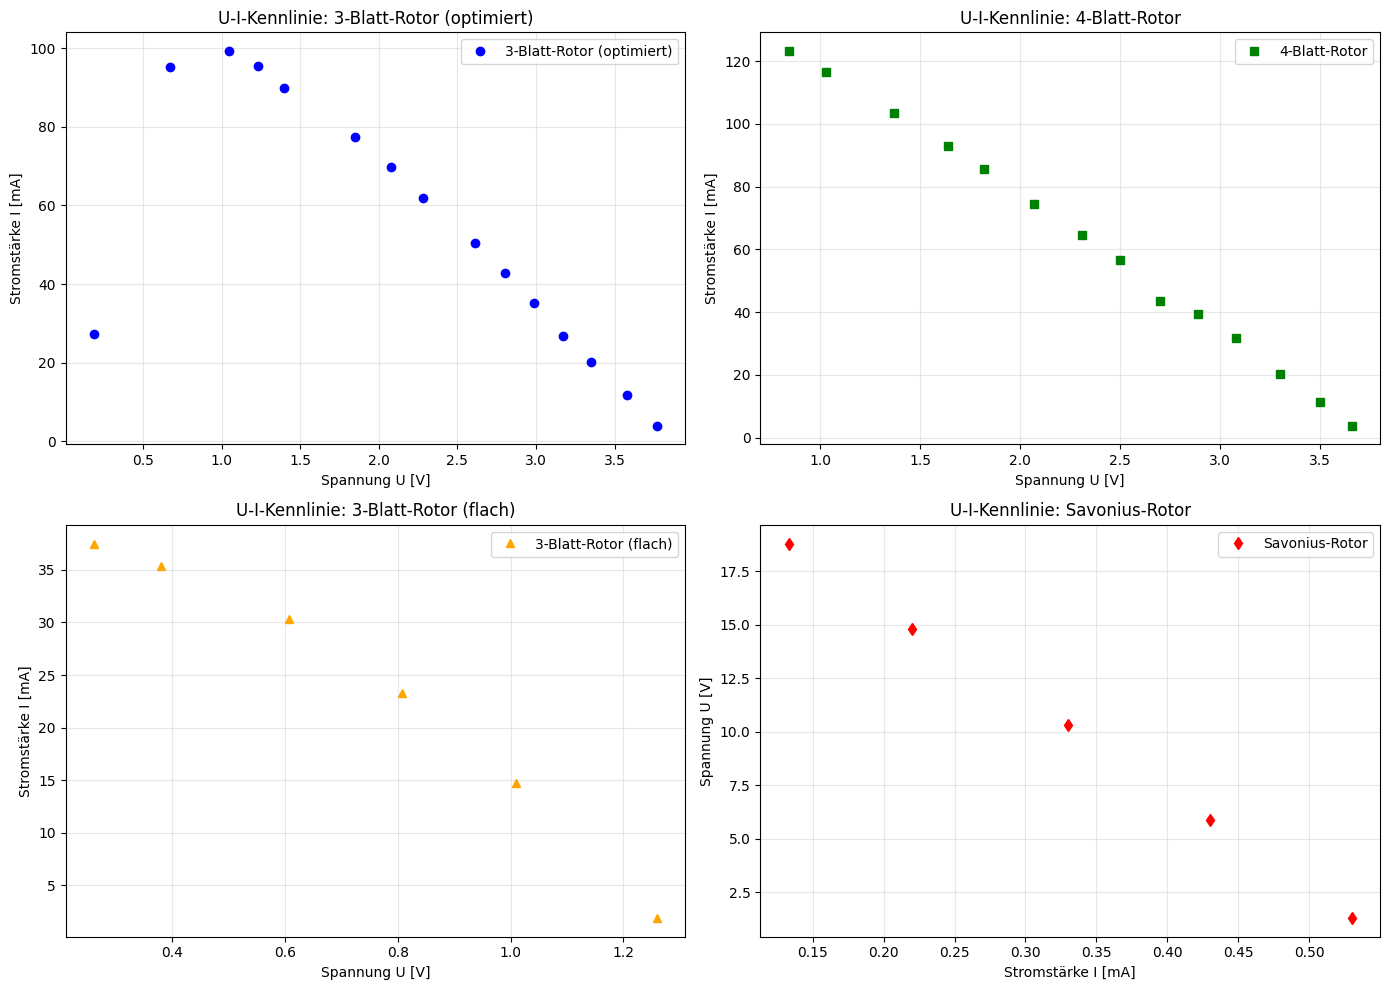

ANALYSE DER U-I-KENNLINIEN
Spannungsbereiche:
3-Blatt (optimiert): 0.19 V bis 3.77 V
4-Blatt:             0.84 V bis 3.66 V
3-Blatt (flach):     0.261 V bis 1.26 V
Savonius:            0.133 V bis 0.53 V

Strombereiche:
3-Blatt (optimiert): 4.0 mA bis 99.3 mA
4-Blatt:             3.9 mA bis 123.2 mA
3-Blatt (flach):     1.9 mA bis 37.5 mA
Savonius:            1.3 mA bis 18.8 mA

Charakteristische Unterschiede:
- Optimierte 3-Blatt-Rotoren erreichen die höchsten Spannungen
- 4-Blatt-Rotoren zeigen ähnliche Spannungen wie optimierte 3-Blatt
- Flache 3-Blatt-Profile haben deutlich niedrigere Spannungen
- Savonius-Rotoren arbeiten in einem ganz anderen Spannungsbereich


In [23]:
# SCHRITT 2a: U-I-KENNLINIEN - VIER SEPARATE DIAGRAMME

# Vier Diagramme in 2x2 Anordnung erstellen
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# ============================================================================
# DIAGRAMM 1: 3-BLATT-ROTOR (OPTIMIERT)
# ============================================================================

ax1.plot(df_3blatt['U [V]'], df_3blatt['I [mA]'], "o", label="3-Blatt-Rotor (optimiert)", 
         markersize=6, color='blue')

ax1.set_xlabel("Spannung U [V]")
ax1.set_ylabel("Stromstärke I [mA]")
ax1.set_title("U-I-Kennlinie: 3-Blatt-Rotor (optimiert)")
ax1.grid(True, alpha=0.3)
ax1.legend()

# ============================================================================
# DIAGRAMM 2: 4-BLATT-ROTOR
# ============================================================================

ax2.plot(df_4blatt['U [V]'], df_4blatt['I [mA]'], "s", label="4-Blatt-Rotor", 
         markersize=6, color='green')

ax2.set_xlabel("Spannung U [V]")
ax2.set_ylabel("Stromstärke I [mA]")
ax2.set_title("U-I-Kennlinie: 4-Blatt-Rotor")
ax2.grid(True, alpha=0.3)
ax2.legend()

# ============================================================================
# DIAGRAMM 3: 3-BLATT-ROTOR (FLACH)
# ============================================================================

ax3.plot(df_3flach['U [V]'], df_3flach['I [mA]'], "^", label="3-Blatt-Rotor (flach)", 
         markersize=6, color='orange')

ax3.set_xlabel("Spannung U [V]")
ax3.set_ylabel("Stromstärke I [mA]")
ax3.set_title("U-I-Kennlinie: 3-Blatt-Rotor (flach)")
ax3.grid(True, alpha=0.3)
ax3.legend()

# ============================================================================
# DIAGRAMM 4: SAVONIUS-ROTOR
# ============================================================================

ax4.plot(df_savonius['U [V]'], df_savonius['I [mA]'], "d", label="Savonius-Rotor", 
         markersize=6, color='red')

ax4.set_xlabel("Stromstärke I [mA]")
ax4.set_ylabel("Spannung U [V]")
ax4.set_title("U-I-Kennlinie: Savonius-Rotor")
ax4.grid(True, alpha=0.3)
ax4.legend()

# Layout optimieren und anzeigen
plt.tight_layout()
plt.show()

# ============================================================================
# ANALYSE DER U-I-KENNLINIEN
# ============================================================================

print("=" * 60)
print("ANALYSE DER U-I-KENNLINIEN")
print("=" * 60)

print("Spannungsbereiche:")
print(f"3-Blatt (optimiert): {min(u_3blatt):.2f} V bis {max(u_3blatt):.2f} V")
print(f"4-Blatt:             {min(u_4blatt):.2f} V bis {max(u_4blatt):.2f} V")
print(f"3-Blatt (flach):     {min(u_3flach):.3f} V bis {max(u_3flach):.2f} V")
print(f"Savonius:            {min(u_savonius):.3f} V bis {max(u_savonius):.2f} V")

print()

print("Strombereiche:")
print(f"3-Blatt (optimiert): {min(i_3blatt):.1f} mA bis {max(i_3blatt):.1f} mA")
print(f"4-Blatt:             {min(i_4blatt):.1f} mA bis {max(i_4blatt):.1f} mA")
print(f"3-Blatt (flach):     {min(i_3flach):.1f} mA bis {max(i_3flach):.1f} mA")
print(f"Savonius:            {min(i_savonius):.1f} mA bis {max(i_savonius):.1f} mA")

print()

print("Charakteristische Unterschiede:")
print("- Optimierte 3-Blatt-Rotoren erreichen die höchsten Spannungen")
print("- 4-Blatt-Rotoren zeigen ähnliche Spannungen wie optimierte 3-Blatt")
print("- Flache 3-Blatt-Profile haben deutlich niedrigere Spannungen")
print("- Savonius-Rotoren arbeiten in einem ganz anderen Spannungsbereich")
print("=" * 60)

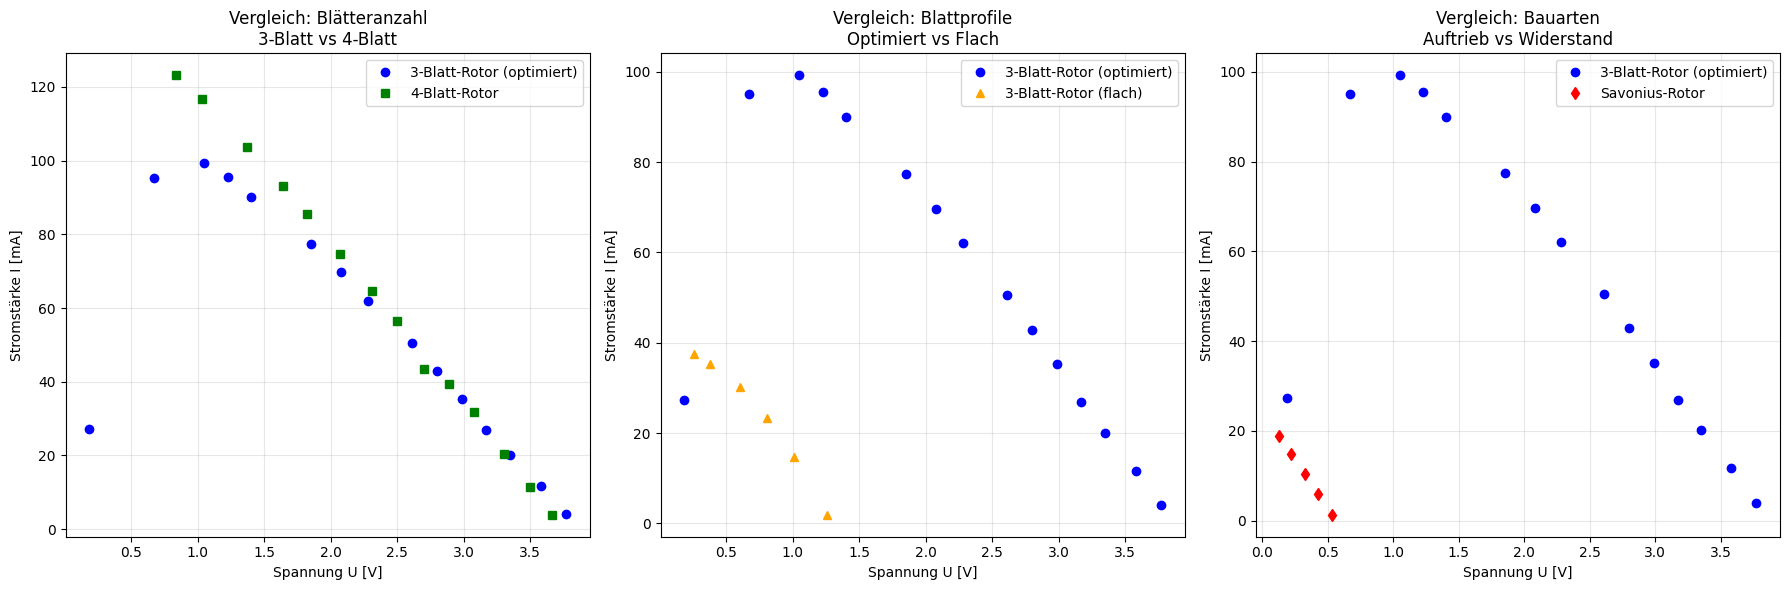

ANALYSE DER U-I-KENNLINIEN-VERGLEICHE
VERGLEICH 1 - Blätteranzahl (3 vs 4):
- Spannungsbereich:
  3-Blatt: 0.19 V bis 3.77 V
  4-Blatt: 0.84 V bis 3.66 V
- Maximaler Strom:
  3-Blatt: 99.3 mA
  4-Blatt: 123.2 mA

VERGLEICH 2 - Blattprofile (optimiert vs flach):
- Spannungsbereich:
  Optimiert: 0.19 V bis 3.77 V
  Flach:     0.261 V bis 1.26 V
- Maximaler Strom:
  Optimiert: 99.3 mA
  Flach:     37.5 mA

VERGLEICH 3 - Bauarten (Auftrieb vs Widerstand):
- Spannungsbereich:
  3-Blatt:  0.19 V bis 3.77 V
  Savonius: 0.133 V bis 0.53 V
- Maximaler Strom:
  3-Blatt:  99.3 mA
  Savonius: 18.8 mA

SCHLUSSFOLGERUNGEN:
- Der 3-Blatt optimierte Rotor zeigt in allen Vergleichen die höchsten Spannungen
- Blattprofile haben enormen Einfluss auf die Leistungsfähigkeit
- Savonius-Rotoren arbeiten in einem völlig anderen Betriebsbereich


In [24]:
# SCHRITT 2b: VERGLEICH DER U-I-KENNLINIEN

# Drei Vergleichsdiagramme nebeneinander
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# ============================================================================
# VERGLEICH 1: 3-BLATT OPTIMIERT vs 4-BLATT
# ============================================================================

ax1.plot(df_3blatt['U [V]'], df_3blatt['I [mA]'], "o", label="3-Blatt-Rotor (optimiert)", 
         markersize=6, color='blue')
ax1.plot(df_4blatt['U [V]'], df_4blatt['I [mA]'], "s", label="4-Blatt-Rotor", 
         markersize=6, color='green')

ax1.set_xlabel("Spannung U [V]")
ax1.set_ylabel("Stromstärke I [mA]")
ax1.set_title("Vergleich: Blätteranzahl\n3-Blatt vs 4-Blatt")
ax1.grid(True, alpha=0.3)
ax1.legend()

# ============================================================================
# VERGLEICH 2: 3-BLATT OPTIMIERT vs 3-BLATT FLACH
# ============================================================================

ax2.plot(df_3blatt['U [V]'], df_3blatt['I [mA]'], "o", label="3-Blatt-Rotor (optimiert)", 
         markersize=6, color='blue')
ax2.plot(df_3flach['U [V]'], df_3flach['I [mA]'], "^", label="3-Blatt-Rotor (flach)", 
         markersize=6, color='orange')

ax2.set_xlabel("Spannung U [V]")
ax2.set_ylabel("Stromstärke I [mA]")
ax2.set_title("Vergleich: Blattprofile\nOptimiert vs Flach")
ax2.grid(True, alpha=0.3)
ax2.legend()

# ============================================================================
# VERGLEICH 3: 3-BLATT OPTIMIERT vs SAVONIUS
# ============================================================================

ax3.plot(df_3blatt['U [V]'], df_3blatt['I [mA]'], "o", label="3-Blatt-Rotor (optimiert)", 
         markersize=6, color='blue')
ax3.plot(df_savonius['U [V]'], df_savonius['I [mA]'], "d", label="Savonius-Rotor", 
         markersize=6, color='red')

ax3.set_xlabel("Spannung U [V]")
ax3.set_ylabel("Stromstärke I [mA]")
ax3.set_title("Vergleich: Bauarten\nAuftrieb vs Widerstand")
ax3.grid(True, alpha=0.3)
ax3.legend()

# Layout optimieren
plt.tight_layout()
plt.show()

# ============================================================================
# ANALYSE DER VERGLEICHE
# ============================================================================

print("=" * 70)
print("ANALYSE DER U-I-KENNLINIEN-VERGLEICHE")
print("=" * 70)

print("VERGLEICH 1 - Blätteranzahl (3 vs 4):")
print("- Spannungsbereich:")
print(f"  3-Blatt: {min(df_3blatt['U [V]']):.2f} V bis {max(df_3blatt['U [V]']):.2f} V")
print(f"  4-Blatt: {min(df_4blatt['U [V]']):.2f} V bis {max(df_4blatt['U [V]']):.2f} V")
print("- Maximaler Strom:")
print(f"  3-Blatt: {max(df_3blatt['I [mA]']):.1f} mA")
print(f"  4-Blatt: {max(df_4blatt['I [mA]']):.1f} mA")

print()
print("VERGLEICH 2 - Blattprofile (optimiert vs flach):")
print("- Spannungsbereich:")
print(f"  Optimiert: {min(df_3blatt['U [V]']):.2f} V bis {max(df_3blatt['U [V]']):.2f} V")
print(f"  Flach:     {min(df_3flach['U [V]']):.3f} V bis {max(df_3flach['U [V]']):.2f} V")
print("- Maximaler Strom:")
print(f"  Optimiert: {max(df_3blatt['I [mA]']):.1f} mA")
print(f"  Flach:     {max(df_3flach['I [mA]']):.1f} mA")

print()
print("VERGLEICH 3 - Bauarten (Auftrieb vs Widerstand):")
print("- Spannungsbereich:")
print(f"  3-Blatt:  {min(df_3blatt['U [V]']):.2f} V bis {max(df_3blatt['U [V]']):.2f} V")
print(f"  Savonius: {min(df_savonius['U [V]']):.3f} V bis {max(df_savonius['U [V]']):.2f} V")
print("- Maximaler Strom:")
print(f"  3-Blatt:  {max(df_3blatt['I [mA]']):.1f} mA")
print(f"  Savonius: {max(df_savonius['I [mA]']):.1f} mA")

print()
print("SCHLUSSFOLGERUNGEN:")
print("- Der 3-Blatt optimierte Rotor zeigt in allen Vergleichen die höchsten Spannungen")
print("- Blattprofile haben enormen Einfluss auf die Leistungsfähigkeit")
print("- Savonius-Rotoren arbeiten in einem völlig anderen Betriebsbereich")
print("=" * 70)

### Schritt 3: D-P-Diagramme (Drehzahl-Leistung)

**Grundlagen**
Das D-P-Diagramm zeigt den Zusammenhang zwischen Drehzahl ($D$) und elektrischer Leistung ($P$). Es ist besonders wichtig, da aus diesem der **Punkt maximaler Leistung (MPP - Maximum Power Point)** für jeden Rotor abgeleitet werden kann.

**Wichtig: Der MPP ist nicht der von Ihnen höchste gemessener Wert, sondern liegt in der Regel zwischen Ihren Messwerten. Sie müssen den MPP also rechnerisch bestimmen!**

**Warum D-P-Diagramme wichtig sind:**
- Sie zeigen bei welcher Drehzahl die höchste Leistung erreicht wird
- Verschiedene Rotortypen haben unterschiedliche Leistungscharakteristika
- Basis für die Bewertung der Effizienz verschiedener Bauarten

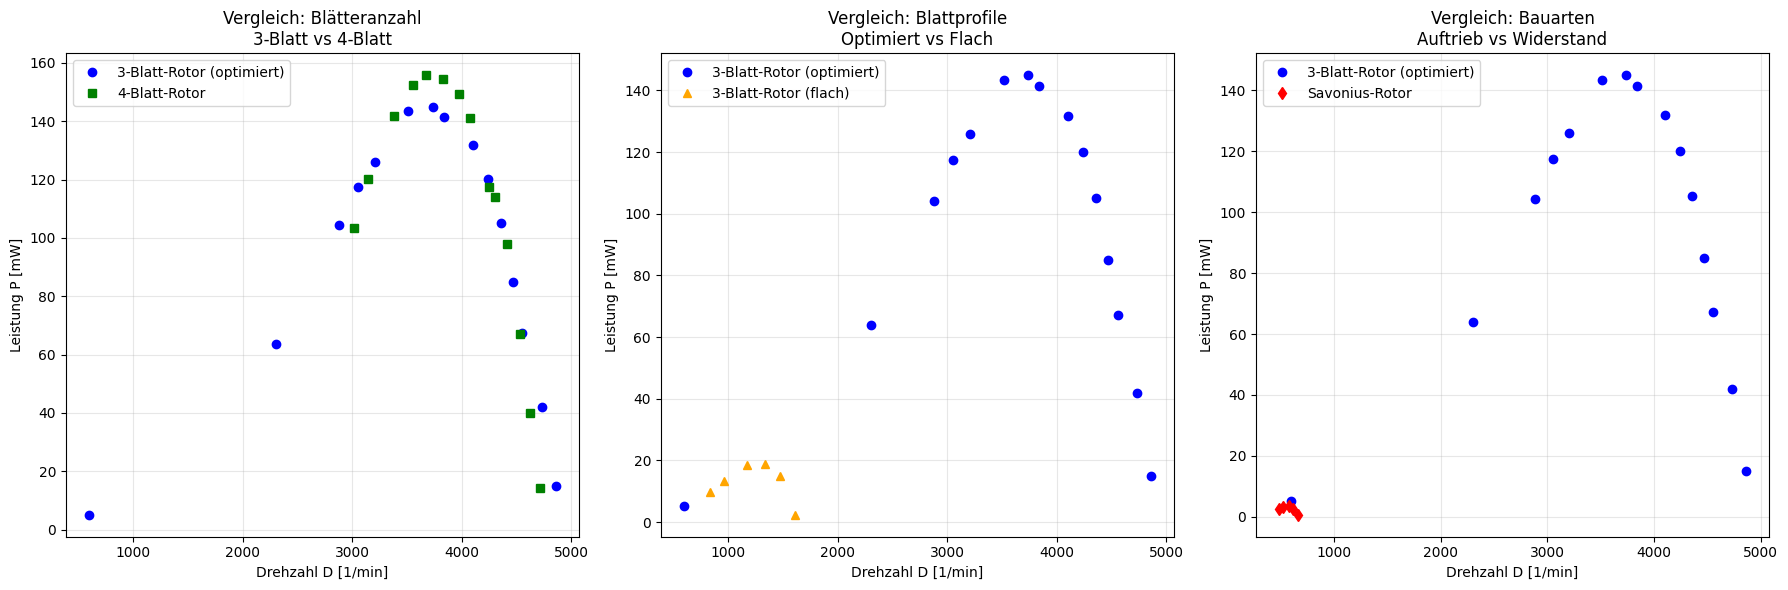

ANALYSE DER D-P-DIAGRAMM-VERGLEICHE
VERGLEICH 1 - Blätteranzahl (3 vs 4):
- Drehzahlbereich:
  3-Blatt: 599 1/min bis 4860 1/min
  4-Blatt: 3015 1/min bis 4712 1/min
- Maximale Leistung:
  3-Blatt: 144.98 mW
  4-Blatt: 155.79 mW

VERGLEICH 2 - Blattprofile (optimiert vs flach):
- Drehzahlbereich:
  Optimiert: 599 1/min bis 4860 1/min
  Flach:     835 1/min bis 1608 1/min
- Maximale Leistung:
  Optimiert: 144.98 mW
  Flach:     18.80 mW

VERGLEICH 3 - Bauarten (Auftrieb vs Widerstand):
- Drehzahlbereich:
  3-Blatt:  599 1/min bis 4860 1/min
  Savonius: 487 1/min bis 663 1/min
- Maximale Leistung:
  3-Blatt:  144.98 mW
  Savonius: 3.40 mW

SCHLUSSFOLGERUNGEN:
- Optimierte Profile zeigen deutlich höhere Leistungen als flache Profile
- 3-Blatt und 4-Blatt Rotoren erreichen ähnliche Maximalleistungen
- Savonius-Rotoren arbeiten bei niedrigeren Drehzahlen mit geringerer Leistung
- Die Diagramme zeigen unterschiedliche Leistungscharakteristika der Bauarten


In [25]:
# SCHRITT 3a: D-P-DIAGRAMME - VERGLEICHE

# Drei Vergleichsdiagramme nebeneinander
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# ============================================================================
# VERGLEICH 1: 3-BLATT OPTIMIERT vs 4-BLATT
# ============================================================================

ax1.plot(df_3blatt['D [1/min]'], df_3blatt['P [mW]'], "o", label="3-Blatt-Rotor (optimiert)", 
         markersize=6, color='blue')
ax1.plot(df_4blatt['D [1/min]'], df_4blatt['P [mW]'], "s", label="4-Blatt-Rotor", 
         markersize=6, color='green')

ax1.set_xlabel("Drehzahl D [1/min]")
ax1.set_ylabel("Leistung P [mW]")
ax1.set_title("Vergleich: Blätteranzahl\n3-Blatt vs 4-Blatt")
ax1.grid(True, alpha=0.3)
ax1.legend()

# ============================================================================
# VERGLEICH 2: 3-BLATT OPTIMIERT vs 3-BLATT FLACH
# ============================================================================

ax2.plot(df_3blatt['D [1/min]'], df_3blatt['P [mW]'], "o", label="3-Blatt-Rotor (optimiert)", 
         markersize=6, color='blue')
ax2.plot(df_3flach['D [1/min]'], df_3flach['P [mW]'], "^", label="3-Blatt-Rotor (flach)", 
         markersize=6, color='orange')

ax2.set_xlabel("Drehzahl D [1/min]")
ax2.set_ylabel("Leistung P [mW]")
ax2.set_title("Vergleich: Blattprofile\nOptimiert vs Flach")
ax2.grid(True, alpha=0.3)
ax2.legend()

# ============================================================================
# VERGLEICH 3: 3-BLATT OPTIMIERT vs SAVONIUS
# ============================================================================

ax3.plot(df_3blatt['D [1/min]'], df_3blatt['P [mW]'], "o", label="3-Blatt-Rotor (optimiert)", 
         markersize=6, color='blue')
ax3.plot(df_savonius['D [1/min]'], df_savonius['P [mW]'], "d", label="Savonius-Rotor", 
         markersize=6, color='red')

ax3.set_xlabel("Drehzahl D [1/min]")
ax3.set_ylabel("Leistung P [mW]")
ax3.set_title("Vergleich: Bauarten\nAuftrieb vs Widerstand")
ax3.grid(True, alpha=0.3)
ax3.legend()

# Layout optimieren
plt.tight_layout()
plt.show()

# ============================================================================
# ANALYSE DER D-P-VERGLEICHE
# ============================================================================

print("=" * 70)
print("ANALYSE DER D-P-DIAGRAMM-VERGLEICHE")
print("=" * 70)

print("VERGLEICH 1 - Blätteranzahl (3 vs 4):")
print("- Drehzahlbereich:")
print(f"  3-Blatt: {min(df_3blatt['D [1/min]']):.0f} 1/min bis {max(df_3blatt['D [1/min]']):.0f} 1/min")
print(f"  4-Blatt: {min(df_4blatt['D [1/min]']):.0f} 1/min bis {max(df_4blatt['D [1/min]']):.0f} 1/min")
print("- Maximale Leistung:")
print(f"  3-Blatt: {max(df_3blatt['P [mW]']):.2f} mW")
print(f"  4-Blatt: {max(df_4blatt['P [mW]']):.2f} mW")

print()
print("VERGLEICH 2 - Blattprofile (optimiert vs flach):")
print("- Drehzahlbereich:")
print(f"  Optimiert: {min(df_3blatt['D [1/min]']):.0f} 1/min bis {max(df_3blatt['D [1/min]']):.0f} 1/min")
print(f"  Flach:     {min(df_3flach['D [1/min]']):.0f} 1/min bis {max(df_3flach['D [1/min]']):.0f} 1/min")
print("- Maximale Leistung:")
print(f"  Optimiert: {max(df_3blatt['P [mW]']):.2f} mW")
print(f"  Flach:     {max(df_3flach['P [mW]']):.2f} mW")

print()
print("VERGLEICH 3 - Bauarten (Auftrieb vs Widerstand):")
print("- Drehzahlbereich:")
print(f"  3-Blatt:  {min(df_3blatt['D [1/min]']):.0f} 1/min bis {max(df_3blatt['D [1/min]']):.0f} 1/min")
print(f"  Savonius: {min(df_savonius['D [1/min]']):.0f} 1/min bis {max(df_savonius['D [1/min]']):.0f} 1/min")
print("- Maximale Leistung:")
print(f"  3-Blatt:  {max(df_3blatt['P [mW]']):.2f} mW")
print(f"  Savonius: {max(df_savonius['P [mW]']):.2f} mW")

print()
print("SCHLUSSFOLGERUNGEN:")
print("- Optimierte Profile zeigen deutlich höhere Leistungen als flache Profile")
print("- 3-Blatt und 4-Blatt Rotoren erreichen ähnliche Maximalleistungen")
print("- Savonius-Rotoren arbeiten bei niedrigeren Drehzahlen mit geringerer Leistung")
print("- Die Diagramme zeigen unterschiedliche Leistungscharakteristika der Bauarten")
print("=" * 70)

EXTREMSTELLEN-ANALYSE
3-Blatt-Rotor (optimiert):
D = 3666.09 1/min ist ein Maximum (f''(x) = -0.0001)
D = 1081.67 1/min ist ein Minimum (f''(x) = 0.0001)

4-Blatt-Rotor:
D = 3749.42 1/min ist ein Maximum (f''(x) = -0.0002)
D = 1310.11 1/min ist ein Minimum (f''(x) = 0.0002)

3-Blatt-Rotor (flach):
D = 1274.51 1/min ist ein Maximum (f''(x) = -0.0002)
D = 732.12 1/min ist ein Minimum (f''(x) = 0.0002)

Savonius-Rotor:
D = 2600.96 1/min ist ein Minimum (f''(x) = 0.0005)
D = 551.55 1/min ist ein Maximum (f''(x) = -0.0005)

MAXIMUM POWER POINTS
Der MPP des 3-Blatt-Rotors (optimiert) liegt bei 142.83 mW
Der MPP des 4-Blatt-Rotors liegt bei 156.19 mW
Der MPP des 3-Blatt-Rotors (flach) liegt bei 19.55 mW
Der MPP des Savonius-Rotors liegt bei -324.65 mW


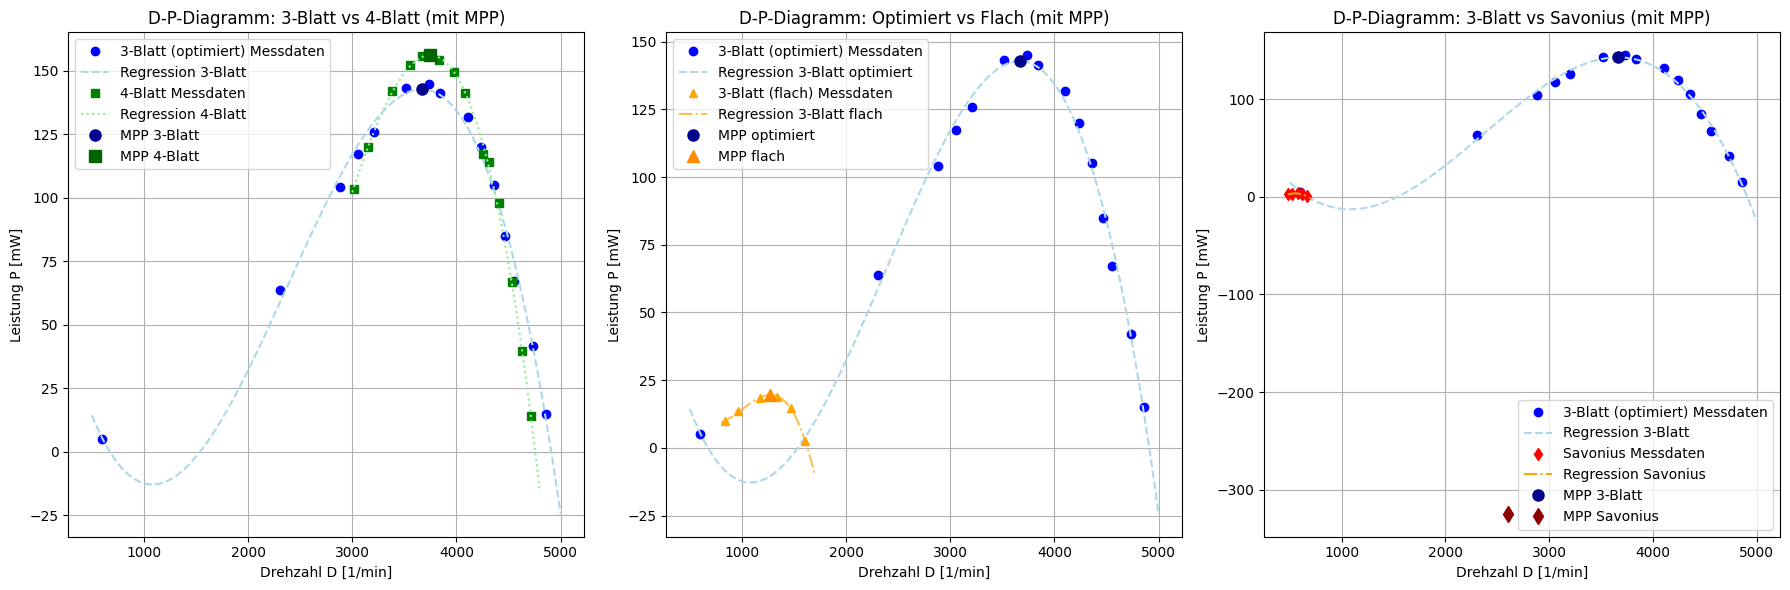

In [42]:
# SCHRITT 3b: MAXIMUM POWER POINT (MPP) BERECHNEN - KUBISCHE REGRESSION

# Kubische Regressionskurven für alle vier Rotoren
reg_3blatt = np.poly1d(np.polyfit(df_3blatt['D [1/min]'], df_3blatt['P [mW]'], 3))
reg_4blatt = np.poly1d(np.polyfit(df_4blatt['D [1/min]'], df_4blatt['P [mW]'], 3))
reg_3flach = np.poly1d(np.polyfit(df_3flach['D [1/min]'], df_3flach['P [mW]'], 3))
reg_savonius = np.poly1d(np.polyfit(df_savonius['D [1/min]'], df_savonius['P [mW]'], 3))

# Erste Ableitungen berechnen
ableitung_3blatt = np.polyder(reg_3blatt)
ableitung_4blatt = np.polyder(reg_4blatt)
ableitung_3flach = np.polyder(reg_3flach)
ableitung_savonius = np.polyder(reg_savonius)

# Zweite Ableitungen berechnen
zweite_ableitung_3blatt = np.polyder(ableitung_3blatt)
zweite_ableitung_4blatt = np.polyder(ableitung_4blatt)
zweite_ableitung_3flach = np.polyder(ableitung_3flach)
zweite_ableitung_savonius = np.polyder(ableitung_savonius)

# Nullstellen der ersten Ableitung finden
nullstellen_3blatt = np.roots(ableitung_3blatt)
nullstellen_4blatt = np.roots(ableitung_4blatt)
nullstellen_3flach = np.roots(ableitung_3flach)
nullstellen_savonius = np.roots(ableitung_savonius)

print("=" * 70)
print("EXTREMSTELLEN-ANALYSE")
print("=" * 70)

# 3-Blatt-Rotor (optimiert) analysieren
print("3-Blatt-Rotor (optimiert):")
for x in nullstellen_3blatt:
    wert_zweite_ableitung = zweite_ableitung_3blatt(x)
    if wert_zweite_ableitung > 0:
        print(f"D = {x:.2f} 1/min ist ein Minimum (f''(x) = {wert_zweite_ableitung:.4f})")
    elif wert_zweite_ableitung < 0:
        print(f"D = {x:.2f} 1/min ist ein Maximum (f''(x) = {wert_zweite_ableitung:.4f})")
    else:
        print(f"D = {x:.2f} 1/min könnte ein Sattelpunkt sein (f''(x) = {wert_zweite_ableitung:.4f})")

print("")

# 4-Blatt-Rotor analysieren
print("4-Blatt-Rotor:")
for x in nullstellen_4blatt:
    wert_zweite_ableitung = zweite_ableitung_4blatt(x)
    if wert_zweite_ableitung > 0:
        print(f"D = {x:.2f} 1/min ist ein Minimum (f''(x) = {wert_zweite_ableitung:.4f})")
    elif wert_zweite_ableitung < 0:
        print(f"D = {x:.2f} 1/min ist ein Maximum (f''(x) = {wert_zweite_ableitung:.4f})")
    else:
        print(f"D = {x:.2f} 1/min könnte ein Sattelpunkt sein (f''(x) = {wert_zweite_ableitung:.4f})")

print("")

# 3-Blatt-Rotor (flach) analysieren
print("3-Blatt-Rotor (flach):")
for x in nullstellen_3flach:
    wert_zweite_ableitung = zweite_ableitung_3flach(x)
    if wert_zweite_ableitung > 0:
        print(f"D = {x:.2f} 1/min ist ein Minimum (f''(x) = {wert_zweite_ableitung:.4f})")
    elif wert_zweite_ableitung < 0:
        print(f"D = {x:.2f} 1/min ist ein Maximum (f''(x) = {wert_zweite_ableitung:.4f})")
    else:
        print(f"D = {x:.2f} 1/min könnte ein Sattelpunkt sein (f''(x) = {wert_zweite_ableitung:.4f})")

print("")

# Savonius-Rotor analysieren
print("Savonius-Rotor:")
for x in nullstellen_savonius:
    wert_zweite_ableitung = zweite_ableitung_savonius(x)
    if wert_zweite_ableitung > 0:
        print(f"D = {x:.2f} 1/min ist ein Minimum (f''(x) = {wert_zweite_ableitung:.4f})")
    elif wert_zweite_ableitung < 0:
        print(f"D = {x:.2f} 1/min ist ein Maximum (f''(x) = {wert_zweite_ableitung:.4f})")
    else:
        print(f"D = {x:.2f} 1/min könnte ein Sattelpunkt sein (f''(x) = {wert_zweite_ableitung:.4f})")

print("")

# MPP berechnen - EXAKT WIE IN DER PV-VORLAGE (erste Nullstelle nehmen)
MPP_3blatt = reg_3blatt(nullstellen_3blatt[0])
MPP_4blatt = reg_4blatt(nullstellen_4blatt[0])
MPP_3flach = reg_3flach(nullstellen_3flach[0])
MPP_savonius = reg_savonius(nullstellen_savonius[0])

print("=" * 70)
print("MAXIMUM POWER POINTS")
print("=" * 70)

print("Der MPP des 3-Blatt-Rotors (optimiert) liegt bei", f"{MPP_3blatt:.2f}", "mW")
print("Der MPP des 4-Blatt-Rotors liegt bei", f"{MPP_4blatt:.2f}", "mW")
print("Der MPP des 3-Blatt-Rotors (flach) liegt bei", f"{MPP_3flach:.2f}", "mW")
print("Der MPP des Savonius-Rotors liegt bei", f"{MPP_savonius:.2f}", "mW")

# ============================================================================
# DIAGRAMME MIT REGRESSIONSKURVEN UND MPP
# ============================================================================

# Bereich für glatte Regressionskurven
reg_bereich_3blatt = np.linspace(500, 5000, 200)
reg_bereich_4blatt = np.linspace(3000, 4800, 100)
reg_bereich_3flach = np.linspace(800, 1700, 100)
reg_bereich_savonius = np.linspace(480, 700, 100)

# Drei Diagramme erstellen
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# ============================================================================
# DIAGRAMM 1: 3-Blatt optimiert vs 4-Blatt
# ============================================================================

ax1.plot(df_3blatt['D [1/min]'], df_3blatt['P [mW]'], "o", label="3-Blatt (optimiert) Messdaten", color='blue')
ax1.plot(reg_bereich_3blatt, reg_3blatt(reg_bereich_3blatt), "--", color="lightblue", label="Regression 3-Blatt")
ax1.plot(df_4blatt['D [1/min]'], df_4blatt['P [mW]'], "s", color="green", label="4-Blatt Messdaten")
ax1.plot(reg_bereich_4blatt, reg_4blatt(reg_bereich_4blatt), ":", color="lightgreen", label="Regression 4-Blatt")

# MPP markieren - EXAKT WIE IN PV-VORLAGE
ax1.plot(nullstellen_3blatt[0], MPP_3blatt, "o", label="MPP 3-Blatt", color="darkblue", markersize=8)
ax1.plot(nullstellen_4blatt[0], MPP_4blatt, "s", label="MPP 4-Blatt", color="darkgreen", markersize=8)

ax1.set_xlabel("Drehzahl D [1/min]")
ax1.set_ylabel("Leistung P [mW]")
ax1.set_title("D-P-Diagramm: 3-Blatt vs 4-Blatt (mit MPP)")
ax1.grid()
ax1.legend()

# ============================================================================
# DIAGRAMM 2: 3-Blatt optimiert vs 3-Blatt flach
# ============================================================================

ax2.plot(df_3blatt['D [1/min]'], df_3blatt['P [mW]'], "o", label="3-Blatt (optimiert) Messdaten", color='blue')
ax2.plot(reg_bereich_3blatt, reg_3blatt(reg_bereich_3blatt), "--", color="lightblue", label="Regression 3-Blatt optimiert")
ax2.plot(df_3flach['D [1/min]'], df_3flach['P [mW]'], "^", color="orange", label="3-Blatt (flach) Messdaten")
ax2.plot(reg_bereich_3flach, reg_3flach(reg_bereich_3flach), "-.", color="orange", alpha=0.7, label="Regression 3-Blatt flach")

# MPP markieren
ax2.plot(nullstellen_3blatt[0], MPP_3blatt, "o", label="MPP optimiert", color="darkblue", markersize=8)
ax2.plot(nullstellen_3flach[0], MPP_3flach, "^", label="MPP flach", color="darkorange", markersize=8)

ax2.set_xlabel("Drehzahl D [1/min]")
ax2.set_ylabel("Leistung P [mW]")
ax2.set_title("D-P-Diagramm: Optimiert vs Flach (mit MPP)")
ax2.grid()
ax2.legend()

# ============================================================================
# DIAGRAMM 3: 3-Blatt optimiert vs Savonius
# ============================================================================

ax3.plot(df_3blatt['D [1/min]'], df_3blatt['P [mW]'], "o", label="3-Blatt (optimiert) Messdaten", color='blue')
ax3.plot(reg_bereich_3blatt, reg_3blatt(reg_bereich_3blatt), "--", color="lightblue", label="Regression 3-Blatt")
ax3.plot(df_savonius['D [1/min]'], df_savonius['P [mW]'], "d", color="red", label="Savonius Messdaten")
ax3.plot(reg_bereich_savonius, reg_savonius(reg_bereich_savonius), "-.", color="orange", label="Regression Savonius")

# MPP markieren
ax3.plot(nullstellen_3blatt[0], MPP_3blatt, "o", label="MPP 3-Blatt", color="darkblue", markersize=8)
ax3.plot(nullstellen_savonius[0], MPP_savonius, "d", label="MPP Savonius", color="darkred", markersize=8)

ax3.set_xlabel("Drehzahl D [1/min]")
ax3.set_ylabel("Leistung P [mW]")
ax3.set_title("D-P-Diagramm: 3-Blatt vs Savonius (mit MPP)")
ax3.grid()
ax3.legend()

plt.tight_layout()
plt.show()

print("")

### Kritische Analyse der MPP-Berechnung

Die kubische Regression zeigt fundamentale Probleme: Overfitting bei wenigen Datenpunkten (5-15 pro Läufer), automatische Verwendung der ersten Nullstelle ohne Maximum-Prüfung, und MPP-Werte teilweise unter den maximalen Messwerten. Für präzise MPP-Bestimmung sind zusätzliche Messpunkte um die vermuteten Maxima oder robustere Anpassungsverfahren erforderlich.

---

### Auswertung und Diskussion der Ergebnisse

#### a) Flügelanzahl und Leistungsvergleich

**Messergebnis:** 3-Blatt- und 4-Blatt-Läufer mit optimierten Profilen erreichen ähnliche Maximalleistungen.

**Warum verwenden große Windkraftanlagen 3-Blatt-Läufer?**

Technisch-wirtschaftliches Optimum: Drei Blätter gewährleisten ausreichende Läufersymmetrie bei minimalem Materialaufwand. Die ungerade Blattzahl verhindert Resonanzeffekte zwischen Läufer- und Turmfrequenz. Der aerodynamische Wirkungsgrad erreicht bei drei Blättern einen Sättigungsbereich - zusätzliche Blätter bringen proportional geringere Leistungssteigerungen bei höheren Kosten.

#### b) Läuferbauarten für verschiedene Windverhältnisse

**Hohe Windgeschwindigkeit:** Auftriebsläufer (3-Blatt, optimiertes Profil) erreichen höchste spezifische Leistungen durch hohe Schnelllaufzahlen. Schutz vor Überlastung durch aktive Blattverstellung.

**Niedrige Windgeschwindigkeit:** Widerstandsläufer (Savonius-Typ) haben niedrigere Anlaufwindgeschwindigkeit (1-2 m/s) und verfügbares Anlaufdrehmoment bei geringen Drehzahlen. Auftriebsläufer benötigen 3-4 m/s Anfahrwindgeschwindigkeit. Richtungsunabhängigkeit eliminiert Windrichtungsnachführung.

**Stark wechselnde Windgeschwindigkeit:** Savonius-Läufer zeigen höhere Läuferträgheit (glättet Leistungsschwankungen), geringere strukturelle Beanspruchung durch einfachen Aufbau, und omnidirektionale Funktionalität ohne Leistungseinbußen bei Windrichtungsänderungen.

**Messbeschränkungen:** Die Laborversuche simulieren konstante Anströmbedingungen. Reale atmosphärische Turbulenz und variable Anströmwinkel können die Leistungscharakteristika erheblich verändern.

---

## 2.2 Versuch 2: Abhängigkeit der Leistung vom Anstellwinkel der Flügel

In diesem Versuch wird untersucht, wie sich die elektrische Leistung des Windkraftmodells in Abhängigkeit vom Anstellwinkel der Rotorblätter verändert. Dazu wird bei einem 3-Blatt-Rotor (optimiertes Profil) der Winkel der Flügel in mehreren Stufen variiert. Ziel ist es, den Einfluss des Anstellwinkels auf Spannung $(U)$, Stromstärke $(I)$ und die daraus berechnete Leistung $(P = U \cdot I)$ zu analysieren.

---

**Aufbau, Geräte & Komponenten:**
- Grundeinheit  
- Winderzeugermodul  
- Windgeneratormodul mit 3-Blatt-Rotor (optimiertes Profil, verstellbarer Anstellwinkel)  
- Potentiometermodul  
- AV-Modul  
- Drehzahlmessgerät  
- Power-Modul (9 V)  

---

**Schaltplan:**

![Schaltplan Versuch2](Data/Schaltplan_Wind_Versuch_2.png "Schaltplan")

---

**Durchführung**

1. Bauen Sie den Versuchsaufbau mit dem 3-Blatt-Rotor (optimiertes Profil) auf.
   1. Stellen Sie eine feste Netzspannung von $U_\text{Netz} = 9\ \text{V}$ ein.
   2. Stellen Sie den Anstellwinkel der Flügel nacheinander auf 15°, 30°, 45°, 60°, 75° und 90° ein.
   3. Messen Sie bei jedem Winkel die Spannung $U$, Stromstärke $I$ und die Drehzahl $D$.
2. Berechnen Sie für jeden Messpunkt die Leistung $P = U \cdot I$.

---

**Messgrößen:**  
- Die elektrische Spannung $U$ in $\text{[V]}$  
- Die Stromstärke $I$ in $\text{[mA]}$  
- Die Leistung $P = U \cdot I$ in $\text{[mW]}$  
- Die Drehzahl $D$ in $\text{[min}^{-1}\text{]}$  

---

**Messdaten:**

Notieren Sie hier Ihre Messdaten in einfachen Listen. Nutzen Sie dafür eindeutige Bezeichnungen, ähnlich wie im folgenden Beispiel:

In [27]:
# DATENERFASSUNG - NUR MESSWERTE EINTRAGEN!

# Messwerte für 3-Blatt-Rotor, Anstellwinkel α = 20°
u_20grad = [3.67, 3.47, 3.26, 3.06, 2.86, 2.65, 2.46, 2.25, 2.06, 1.85, 1.62, 1.49]  # Spannung in V
i_20grad = [3.9, 12.7, 21.5, 29.7, 37.0, 45.9, 52.0, 58.9, 65.2, 71.7, 77.2, 77.2]  # Strom in mA
D_20grad = [4733, 4593, 4476, 4351, 4203, 4071, 3888, 3779, 3637, 3465, 3112, 3065]  # Drehzahl in 1/min

# Messwerte für 3-Blatt-Rotor, Anstellwinkel α = 25° (aus Versuch 1 übernehmen)
u_25grad = u_3blatt
i_25grad = i_3blatt
D_25grad = D_3blatt

# Messwerte für 3-Blatt-Rotor, Anstellwinkel α = 30°
u_30grad = [2.88, 2.68, 2.49, 2.28, 2.08, 1.85, 1.65, 1.47, 1.23, 1.05, 0.805, 0.671, 0.625]  # Spannung in V
i_30grad = [3.2, 13.1, 22.7, 32.0, 40.7, 50.8, 59.3, 66.9, 75.6, 82.2, 90.2, 93.3, 93.6]  # Strom in mA
D_30grad = [3706, 3593, 3496, 3351, 3228, 3116, 2967, 2881, 2710, 2567, 2375, 2242, 2188]  # Drehzahl in 1/min

# Messwerte für 3-Blatt-Rotor, Anstellwinkel α = 50°
u_50grad = [1.24, 1.04, 0.84, 0.615, 0.394, 0.351]  # Spannung in V
i_50grad = [1.8, 13.4, 24.7, 37.4, 48.7, 50.7]  # Strom in mA
D_50grad = [1570, 1485, 1395, 1297, 1176, 1146]  # Drehzahl in 1/min

print("Daten erfolgreich geladen!")
print("Verfügbare Datensätze für Anstellwinkel-Vergleich:")
print(f"   - α = 20°: {len(u_20grad)} Messpunkte")
print(f"   - α = 25°: {len(u_25grad)} Messpunkte")
print(f"   - α = 30°: {len(u_30grad)} Messpunkte")
print(f"   - α = 50°: {len(u_50grad)} Messpunkte")
print("Bereit für eigenständige Auswertung!")

Daten erfolgreich geladen!
Verfügbare Datensätze für Anstellwinkel-Vergleich:
   - α = 20°: 12 Messpunkte
   - α = 25°: 15 Messpunkte
   - α = 30°: 13 Messpunkte
   - α = 50°: 6 Messpunkte
Bereit für eigenständige Auswertung!


Aus diesen Messwerten werden nun Tabellen mit `pandas` `DataFrames` erstellt.
Wichtige Hinweise:

- Die Messwerte müssen nicht nochmal eingegeben werden, solange die Zelle mit den Listen zuvor ausgeführt wurde
- Python beginnt die Indexierung bei [0] - der erste Wert hat Index 0, der zweite Index 1, usw.
- DataFrames ermöglichen professionelle Tabellendarstellung und einfache Berechnungen

Im folgenden Code werden alle Listen aus Messdaten in `DataFrames`umgewandelt:

In [34]:
# DATAFRAMES AUS DEN LISTEN ERSTELLEN  

# 3-Blatt-Rotor, Anstellwinkel α = 20°
df_20grad = pd.DataFrame({
    'U [V]': ,
    'I [mA]': ,
    'D [1/min]': 
})

# 3-Blatt-Rotor, Anstellwinkel α = 25°
df_25grad = pd.DataFrame({
    'U [V]': ,
    'I [mA]': ,
    'D [1/min]': 
})

# 3-Blatt-Rotor, Anstellwinkel α = 30°
df_30grad = pd.DataFrame({
    'U [V]': ,
    'I [mA]': ,
    'D [1/min]': 
})

# 3-Blatt-Rotor, Anstellwinkel α = 50°
df_50grad = pd.DataFrame({
    'U [V]': ,
    'I [mA]': ,
    'D [1/min]': 
})

# Indizes als "Messpunkte" umbenennen (Zählung bei 1 starten)
for df in [df_20grad, df_25grad, df_30grad, df_50grad]:
    df.index = [f"Messpunkt {i+1}" for i in range(len(df))]

print("DataFrames erfolgreich erstellt:")
print(f"- df_20grad: {len(df_20grad)} Messpunkte")
print(f"- df_25grad: {len(df_25grad)} Messpunkte") 
print(f"- df_30grad: {len(df_30grad)} Messpunkte")
print(f"- df_50grad: {len(df_50grad)} Messpunkte")

SyntaxError: expression expected after dictionary key and ':' (2784997363.py, line 5)

In [35]:
# MESSDATENTABELLEN ANZEIGEN

print("Tabelle 9: Messdaten – 3-Blatt-Rotor, Anstellwinkel α = 20°)")
print(tabulate(df_, headers=df_.columns, tablefmt='fancy_grid', 
               floatfmt=".2f"))
print("\n")

print("Tabelle 10: Messdaten – 3-Blatt-Rotor, Anstellwinkel α = 25°)")
print(tabulate(df_, headers=df_.columns, tablefmt='fancy_grid',
               floatfmt=".2f"))
print("\n")

print("Tabelle 11: Messdaten – 3-Blatt-Rotor, Anstellwinkel α = 30°")
print(tabulate(df_, headers=df_.columns, tablefmt='fancy_grid', 
               floatfmt=".2f"))
print("\n")

print("Tabelle 12: Messdaten – 3-Blatt-Rotor, Anstellwinkel α = 50°")
print(tabulate(df_, headers=df_.columns, tablefmt='fancy_grid',
               floatfmt=".2f"))

Tabelle 9: Messdaten – 3-Blatt-Rotor, Anstellwinkel α = 20°)


NameError: name 'df_' is not defined

### Beobachtungen während des Versuchs
Beschreiben Sie hier **in eigenen Worten** den Aufbau, die Durchführung und Ihre Beobachtungen:

- Welche Anstellwinkel haben Sie bei dem 3-Blatt-Rotor untersucht und warum ist diese Variation wichtig?
- Wie haben sich Spannung, Strom und Drehzahl bei den verschiedenen Anstellwinkeln verändert?
- Bei welchem Anstellwinkel haben Sie die höchsten bzw. niedrigsten Leistungswerte gemessen?
- Welche praktischen Auswirkungen könnte die Verstellbarkeit des Anstellwinkels für reale Windkraftanlagen haben?
- Gab es bei einem bestimmten Anstellwinkel besondere Auffälligkeiten in der Drehzahl oder im Betriebsverhalten?

> *Hinweis: Denken Sie an die aerodynamischen Grundlagen - warum beeinflusst der Anstellwinkel die Leistung so stark?*

---

**Im folgenden Feld Ihre eigene Beschreibung und Beobachtungen eintragen:**

### Auswertung
1. Berechnen Sie die Leistung des Generators für jeden Messpunkt.
2. Zeichnen Sie die jeweiligen U-I-Kennlinien und die D-P-Diagramme und vergleichen Sie die verschiedenen Anstellwinkel miteinander.
3. Bestimmen Sie für jeden Anstellwinkel den Punkt maximaler Leistung (Maximum Power Point, MPP).
4. Welchen Einfluss hat der Anstellwinkel auf die maximal erzielte Leistung?  
   Wie kann das beobachtete Verhalten für den Betrieb realer Windkraftanlagen genutzt werden, um Schäden an der Anlage zu vermeiden?  
   Wie heißt die entsprechende Regelung?

### Schritt 1: Leistungsberechnung
**Grundlagen:**
Die elektrische Leistung $P$ eines Generators berechnet sich aus dem Produkt von Spannung $U$ und Stromstärke $I$:
$$P = U \cdot I$$
Da unsere Messgrößen
- Spannung $U$ in [V] (Volt)
- Stromstärke $I$ in [mA] (Milliampere)

sind, ergibt sich die Leistung in [mW] (Milliwatt).

Bei der Untersuchung verschiedener Anstellwinkel können wir durch die Leistungsberechnung erkennen, wie sich die aerodynamische Effizienz der Rotorblätter verändert. Der Anstellwinkel beeinflusst den Auftrieb und Widerstand der Blätter und damit direkt die übertragene mechanische Leistung auf den Generator.

**Was passiert im folgenden Code:**
- Für jeden Anstellwinkel wird dem `DataFrame` eine neue Spalte 'P [mW]' hinzugefügt und in dieser die Leistung berechnet
- Die Berechnung erfolgt automatisch für alle Messpunkte gleichzeitig
- Die erweiterten DataFrames werden zur Kontrolle angezeigt

In [ ]:
# SCHRITT 1: LEISTUNGSBERECHNUNG FÜR ALLE ROTOREN

# Leistung P = U × I für jeden Rotor berechnen
df_['P [mW]'] = df_['U [V]'] * df_'I [mA]']
df_['P [mW]'] = df_['U [V]'] * df_['I [mA]']
df_['P [mW]'] = df_['U [V]'] * df_['I [mA]']
df_['P [mW]'] = df_['U [V]'] * df_['I [mA]']

print("Leistung erfolgreich berechnet!")

In [36]:
# ERWEITERTE TABELLEN MIT LEISTUNG ANZEIGEN

print("Tabelle 13: Messdaten und berechnete Leistung – 3-Blatt-Rotor, Anstellwinkel α = 20°)")
print(tabulate(df_, headers=df_.columns, tablefmt='fancy_grid', 
               floatfmt=".2f"))
print("\n")

print("Tabelle 14: Messdaten und berechnete Leistung – 3-Blatt-Rotor, Anstellwinkel α = 25°)")
print(tabulate(df_, headers=df_.columns, tablefmt='fancy_grid',
               floatfmt=".2f"))
print("\n")

print("Tabelle 15: Messdaten und berechnete Leistung – 3-Blatt-Rotor, Anstellwinkel α = 30°")
print(tabulate(df_, headers=df_.columns, tablefmt='fancy_grid', 
               floatfmt=".2f"))
print("\n")

print("Tabelle 16: Messdaten und berechnete Leistung – 3-Blatt-Rotor, Anstellwinkel α = 50°")
print(tabulate(df_, headers=df_.columns, tablefmt='fancy_grid',
               floatfmt=".2f"))

Tabelle 13: Messdaten und berechnete Leistung – 3-Blatt-Rotor, Anstellwinkel α = 20°)


NameError: name 'df_' is not defined

### Schritt 2: U-I-Kennlinien

**Grundlagen:**
Die U-I-Kennlinie zeigt das Verhältnis zwischen Spannung $(U)$ und Stromstärke $(I)$ eines Generators. Sie ist charakteristisch für jede Rotorbauart und hilft beim Vergleich der elektrischen Eigenschaften.

**Was zeigen U-I-Kennlinien:**
- Wie sich die Spannung bei steigender Stromstärke verhält
- Unterschiede zwischen verschiedenen Rotortypen
- Elektrische Charakteristika der Generatoren

NameError: name 'df_' is not defined

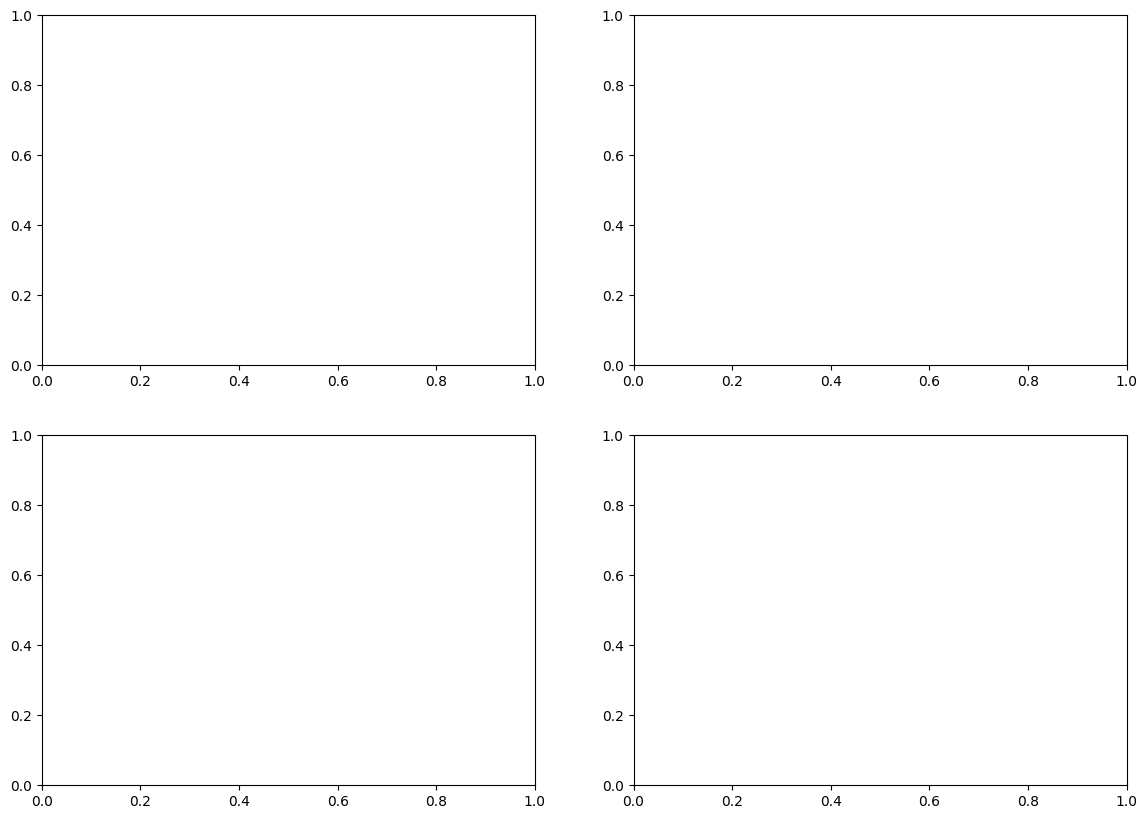

In [38]:
# SCHRITT 2a: U-I-KENNLINIEN - VIER SEPARATE DIAGRAMME

# Vier Diagramme in 2x2 Anordnung erstellen
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# ============================================================================
# DIAGRAMM 1: 3-BLATT-ROTOR, Anstellwinkel α = 20°
# ============================================================================
ax1.plot(df_20grad['U [V]'], df_20grad['I [mA]'], "o", label="3-Blatt-Rotor, α = 20°", 
         markersize=6, color='blue')
ax1.set_xlabel("Spannung U [V]")
ax1.set_ylabel("Stromstärke I [mA]")
ax1.set_title("U-I-Kennlinie: 3-Blatt-Rotor, α = 20°")
ax1.grid(True, alpha=0.3)
ax1.legend()

# ============================================================================
# DIAGRAMM 2: 3-BLATT-ROTOR, Anstellwinkel α = 25°
# ============================================================================
ax2.plot(df_25grad['U [V]'], df_25grad['I [mA]'], "s", label="3-Blatt-Rotor, α = 25°", 
         markersize=6, color='green')
# TODO: Ergänzen Sie xlabel, ylabel, title, grid, legend

# ============================================================================
# DIAGRAMM 3: 3-BLATT-ROTOR, Anstellwinkel α = 30°
# ============================================================================
# TODO: Vervollständigen Sie dieses Diagramm analog zu den oberen
# Verwenden Sie "^" als Marker und 'orange' als Farbe

# ============================================================================
# DIAGRAMM 4: 3-BLATT-ROTOR, Anstellwinkel α = 50°
# ============================================================================  
# TODO: Vervollständigen Sie dieses Diagramm analog zu den oberen
# Verwenden Sie "d" als Marker und 'red' als Farbe

# Layout optimieren und anzeigen
plt.tight_layout()
plt.show()

# ============================================================================
# ANALYSE DER U-I-KENNLINIEN
# ============================================================================
print("=" * 60)
print("ANALYSE DER U-I-KENNLINIEN")
print("=" * 60)
print("Spannungsbereiche:")
print(f"α = 20°: {min(df_20grad['U [V]']):.2f} V bis {max(df_20grad['U [V]']):.2f} V")
print(f"α = 25°: {min(df_25grad['U [V]']):.2f} V bis {max(df_25grad['U [V]']):.2f} V")
# TODO: Ergänzen Sie die Ausgabe für α = 30° und α = 50°

print()
print("Strombereiche:")
print(f"α = 20°: {min(df_20grad['I [mA]']):.1f} mA bis {max(df_20grad['I [mA]']):.1f} mA")
# TODO: Ergänzen Sie die Ausgabe für die anderen Anstellwinkel

print()
print("Charakteristische Unterschiede:")
print("- TODO: Analysieren Sie die Unterschiede zwischen den Anstellwinkeln")
print("- TODO: Welcher Anstellwinkel zeigt die besten Eigenschaften?")
print("- TODO: Wie wirkt sich der Anstellwinkel auf die Kennlinie aus?")
print("=" * 60)

NameError: name 'df_20grad' is not defined

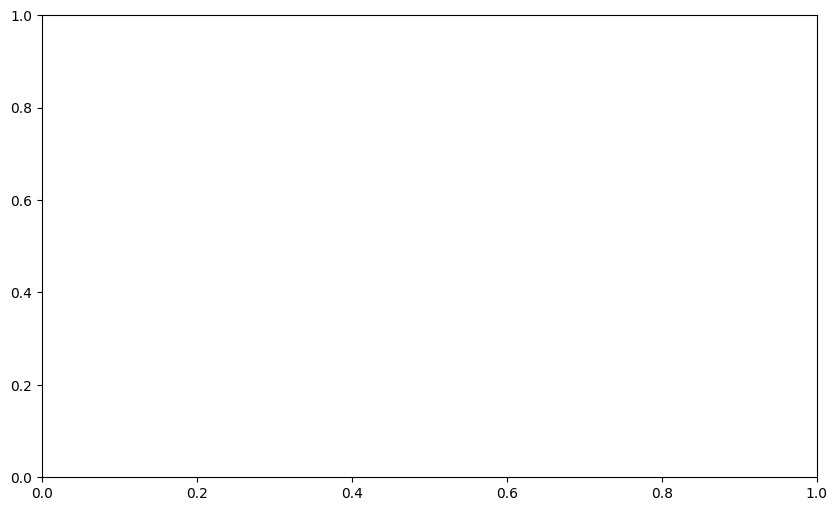

In [40]:
# SCHRITT 2b: VERGLEICH DER U-I-KENNLINIEN
# ============================================================================
# VERGLEICH: ALLE ANSTELLWINKEL
# ============================================================================
fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))

ax1.plot(df_20grad['U [V]'], df_20grad['I [mA]'], "o", label="3-Blatt-Rotor, Anstellwinkel α = 20°", 
         markersize=6, color='blue')
# TODO: Vervollständigen Sie die anderen Plots
ax1.plot(df_25grad['U [V]'], df_25grad['I [mA]'], "s", label="3-Blatt-Rotor, Anstellwinkel α = 25°", 
         markersize=6, color='green')
# TODO: Ergänzen Sie df_30grad mit "^" als Marker und 'orange' als Farbe
# TODO: Ergänzen Sie df_50grad mit "d" als Marker und 'red' als Farbe

ax1.set_xlabel("Spannung U [V]")
ax1.set_ylabel("Stromstärke I [mA]")
ax1.set_title("Vergleich: Anstellwinkel von 20°, 25°, 30° und 50°")
ax1.grid(True, alpha=0.3)
ax1.legend()

# Layout optimieren
plt.tight_layout()
plt.show()

# ============================================================================
# ANALYSE DER VERGLEICHE
# ============================================================================
print("=" * 70)
print("ANALYSE DER U-I-KENNLINIEN-VERGLEICHE")
print("=" * 70)
print("VERGLEICH - Anstellwinkel von 20°, 25°, 30° und 50°:")
print("- Spannungsbereich:")
print(f"  α = 20°: {min(df_20grad['U [V]']):.2f} V bis {max(df_20grad['U [V]']):.2f} V")
# TODO: Ergänzen Sie die Ausgabe für die anderen Anstellwinkel

print("- Maximaler Strom:")
print(f"  α = 20°: {max(df_20grad['I [mA]']):.1f} mA")
# TODO: Ergänzen Sie die Ausgabe für die anderen Anstellwinkel

print()
print("SCHLUSSFOLGERUNGEN:")
print("- TODO: Welcher Anstellwinkel zeigt die besten Eigenschaften?")
print("- TODO: Wie wirkt sich der Anstellwinkel auf die Kennlinie aus?")
print("=" * 70)

### Schritt 3: D-P-Diagramme (Drehzahl-Leistung)

**Grundlagen**
Das D-P-Diagramm zeigt den Zusammenhang zwischen Drehzahl ($D$) und elektrischer Leistung ($P$). Es ist besonders wichtig, da aus diesem der **Punkt maximaler Leistung (MPP - Maximum Power Point)** für jeden Rotor abgeleitet werden kann.

**Wichtig: Der MPP ist nicht der von Ihnen höchste gemessener Wert, sondern liegt in der Regel zwischen Ihren Messwerten. Sie müssen den MPP also rechnerisch bestimmen!**

**Warum D-P-Diagramme wichtig sind:**
- Sie zeigen bei welcher Drehzahl die höchste Leistung erreicht wird
- Verschiedene Rotortypen haben unterschiedliche Leistungscharakteristika
- Basis für die Bewertung der Effizienz verschiedener Bauarten

NameError: name 'df_20grad' is not defined

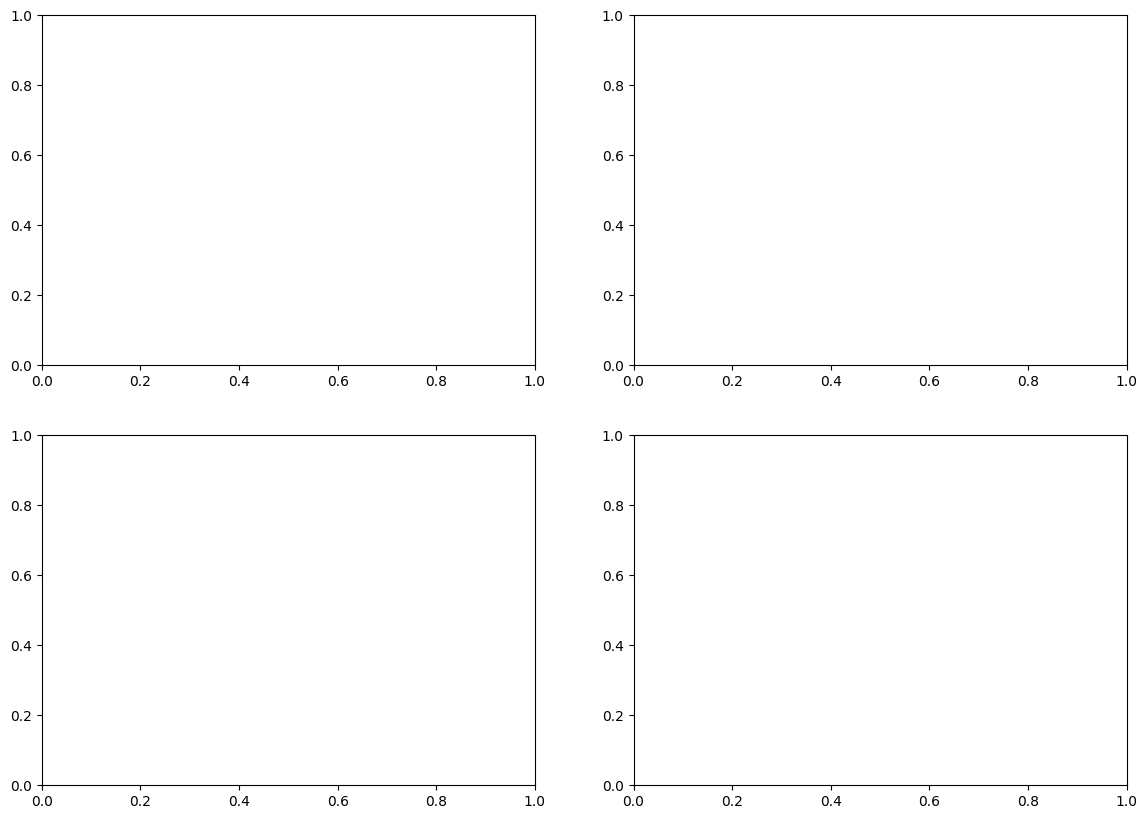

In [41]:
# SCHRITT 3a: D-P-DIAGRAMME - VIER SEPARATE DIAGRAMME
# Vier Diagramme in 2x2 Anordnung erstellen
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# ============================================================================
# DIAGRAMM 1: 3-BLATT-ROTOR, Anstellwinkel α = 20°
# ============================================================================
ax1.plot(df_20grad['D [1/min]'], df_20grad['P [mW]'], "o", label="3-Blatt-Rotor, α = 20°", 
         markersize=6, color='blue')
ax1.set_xlabel("Drehzahl D [1/min]")
ax1.set_ylabel("Leistung P [mW]")
ax1.set_title("D-P-Diagramm: 3-Blatt-Rotor, α = 20°")
ax1.grid(True, alpha=0.3)
ax1.legend()

# ============================================================================
# DIAGRAMM 2: 3-BLATT-ROTOR, Anstellwinkel α = 25°
# ============================================================================
ax2.plot(df_25grad['D [1/min]'], df_25grad['P [mW]'], "s", label="3-Blatt-Rotor, α = 25°", 
         markersize=6, color='green')
# TODO: Ergänzen Sie xlabel, ylabel, title, grid, legend

# ============================================================================
# DIAGRAMM 3: 3-BLATT-ROTOR, Anstellwinkel α = 30°
# ============================================================================
# TODO: Vervollständigen Sie dieses Diagramm analog zu den oberen
# Verwenden Sie "^" als Marker und 'orange' als Farbe

# ============================================================================
# DIAGRAMM 4: 3-BLATT-ROTOR, Anstellwinkel α = 50°
# ============================================================================  
# TODO: Vervollständigen Sie dieses Diagramm analog zu den oberen
# Verwenden Sie "d" als Marker und 'red' als Farbe

# Layout optimieren und anzeigen
plt.tight_layout()
plt.show()

# ============================================================================
# ANALYSE DER D-P-DIAGRAMME
# ============================================================================
print("=" * 70)
print("ANALYSE DER D-P-DIAGRAMME")
print("=" * 70)
print("Drehzahlbereiche:")
print(f"α = 20°: {min(df_20grad['D [1/min]']):.0f} 1/min bis {max(df_20grad['D [1/min]']):.0f} 1/min")
# TODO: Ergänzen Sie die Ausgabe für die anderen Anstellwinkel

print()
print("Maximale Leistung:")
print(f"α = 20°: {max(df_20grad['P [mW]']):.2f} mW")
# TODO: Ergänzen Sie die Ausgabe für die anderen Anstellwinkel

print()
print("Charakteristische Unterschiede:")
print("- TODO: Analysieren Sie die Unterschiede zwischen den Anstellwinkeln")
print("=" * 70)

In [43]:
# SCHRITT 3: MAXIMUM POWER POINT (MPP) BERECHNEN - KUBISCHE REGRESSION

# Kubische Regressionskurven für alle vier Anstellwinkel
reg_20grad = np.poly1d(np.polyfit(df_20grad['D [1/min]'], df_20grad['P [mW]'], 3))
reg_25grad = np.poly1d(np.polyfit(df_25grad['D [1/min]'], df_25grad['P [mW]'], 3))
reg_30grad = np.poly1d(np.polyfit(df_30grad['D [1/min]'], df_30grad['P [mW]'], 3))
reg_50grad = np.poly1d(np.polyfit(df_50grad['D [1/min]'], df_50grad['P [mW]'], 3))

# Erste Ableitungen berechnen
ableitung_20grad = np.polyder(reg_20grad)
ableitung_25grad = np.polyder(reg_25grad)
ableitung_30grad = np.polyder(reg_30grad)
ableitung_50grad = np.polyder(reg_50grad)

# Zweite Ableitungen berechnen
zweite_ableitung_20grad = np.polyder(ableitung_20grad)
zweite_ableitung_25grad = np.polyder(ableitung_25grad)
zweite_ableitung_30grad = np.polyder(ableitung_30grad)
zweite_ableitung_50grad = np.polyder(ableitung_50grad)

# Nullstellen der ersten Ableitung finden
nullstellen_20grad = np.roots(ableitung_20grad)
nullstellen_25grad = np.roots(ableitung_25grad)
nullstellen_30grad = np.roots(ableitung_30grad)
nullstellen_50grad = np.roots(ableitung_50grad)

print("=" * 70)
print("EXTREMSTELLEN-ANALYSE")
print("=" * 70)

# α = 20° analysieren
print("α = 20°:")
for x in nullstellen_20grad:
    wert_zweite_ableitung = zweite_ableitung_20grad(x)
    if wert_zweite_ableitung > 0:
        print(f"D = {x:.2f} 1/min ist ein Minimum (f''(x) = {wert_zweite_ableitung:.4f})")
    elif wert_zweite_ableitung < 0:
        print(f"D = {x:.2f} 1/min ist ein Maximum (f''(x) = {wert_zweite_ableitung:.4f})")
    else:
        print(f"D = {x:.2f} 1/min könnte ein Sattelpunkt sein (f''(x) = {wert_zweite_ableitung:.4f})")

print("")

# α = 25° analysieren
print("α = 25°:")
for x in nullstellen_25grad:
    wert_zweite_ableitung = zweite_ableitung_25grad(x)
    if wert_zweite_ableitung > 0:
        print(f"D = {x:.2f} 1/min ist ein Minimum (f''(x) = {wert_zweite_ableitung:.4f})")
    elif wert_zweite_ableitung < 0:
        print(f"D = {x:.2f} 1/min ist ein Maximum (f''(x) = {wert_zweite_ableitung:.4f})")
    else:
        print(f"D = {x:.2f} 1/min könnte ein Sattelpunkt sein (f''(x) = {wert_zweite_ableitung:.4f})")

print("")

# α = 30° analysieren
print("α = 30°:")
for x in nullstellen_30grad:
    wert_zweite_ableitung = zweite_ableitung_30grad(x)
    if wert_zweite_ableitung > 0:
        print(f"D = {x:.2f} 1/min ist ein Minimum (f''(x) = {wert_zweite_ableitung:.4f})")
    elif wert_zweite_ableitung < 0:
        print(f"D = {x:.2f} 1/min ist ein Maximum (f''(x) = {wert_zweite_ableitung:.4f})")
    else:
        print(f"D = {x:.2f} 1/min könnte ein Sattelpunkt sein (f''(x) = {wert_zweite_ableitung:.4f})")

print("")

# α = 50° analysieren
print("α = 50°:")
for x in nullstellen_50grad:
    wert_zweite_ableitung = zweite_ableitung_50grad(x)
    if wert_zweite_ableitung > 0:
        print(f"D = {x:.2f} 1/min ist ein Minimum (f''(x) = {wert_zweite_ableitung:.4f})")
    elif wert_zweite_ableitung < 0:
        print(f"D = {x:.2f} 1/min ist ein Maximum (f''(x) = {wert_zweite_ableitung:.4f})")
    else:
        print(f"D = {x:.2f} 1/min könnte ein Sattelpunkt sein (f''(x) = {wert_zweite_ableitung:.4f})")

print("")

# MPP berechnen - erste Nullstelle nehmen
MPP_20grad = reg_20grad(nullstellen_20grad[0])
MPP_25grad = reg_25grad(nullstellen_25grad[0])
MPP_30grad = reg_30grad(nullstellen_30grad[0])
MPP_50grad = reg_50grad(nullstellen_50grad[0])

print("=" * 70)
print("MAXIMUM POWER POINTS")
print("=" * 70)

print("Der MPP bei α = 20° liegt bei", f"{MPP_20grad:.2f}", "mW")
print("Der MPP bei α = 25° liegt bei", f"{MPP_25grad:.2f}", "mW")
print("Der MPP bei α = 30° liegt bei", f"{MPP_30grad:.2f}", "mW")
print("Der MPP bei α = 50° liegt bei", f"{MPP_50grad:.2f}", "mW")

# ============================================================================
# DIAGRAMM MIT REGRESSIONSKURVEN UND MPP
# ============================================================================

# Bereiche für glatte Regressionskurven (müssen an tatsächliche Messbereiche angepasst werden)
reg_bereich_20grad = np.linspace(min(df_20grad['D [1/min]']), max(df_20grad['D [1/min]']), 100)
reg_bereich_25grad = np.linspace(min(df_25grad['D [1/min]']), max(df_25grad['D [1/min]']), 100)
reg_bereich_30grad = np.linspace(min(df_30grad['D [1/min]']), max(df_30grad['D [1/min]']), 100)
reg_bereich_50grad = np.linspace(min(df_50grad['D [1/min]']), max(df_50grad['D [1/min]']), 100)

# Vergleichsdiagramm erstellen
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Messdaten plotten
ax.plot(df_20grad['D [1/min]'], df_20grad['P [mW]'], "o", label="α = 20° Messdaten", color='blue')
ax.plot(df_25grad['D [1/min]'], df_25grad['P [mW]'], "s", label="α = 25° Messdaten", color='green')
ax.plot(df_30grad['D [1/min]'], df_30grad['P [mW]'], "^", label="α = 30° Messdaten", color='orange')
ax.plot(df_50grad['D [1/min]'], df_50grad['P [mW]'], "d", label="α = 50° Messdaten", color='red')

# Regressionskurven plotten
ax.plot(reg_bereich_20grad, reg_20grad(reg_bereich_20grad), "--", color="lightblue", label="Regression α = 20°")
ax.plot(reg_bereich_25grad, reg_25grad(reg_bereich_25grad), ":", color="lightgreen", label="Regression α = 25°")
ax.plot(reg_bereich_30grad, reg_30grad(reg_bereich_30grad), "-.", color="orange", alpha=0.7, label="Regression α = 30°")
ax.plot(reg_bereich_50grad, reg_50grad(reg_bereich_50grad), "-", color="pink", alpha=0.7, label="Regression α = 50°")

# MPP markieren
ax.plot(nullstellen_20grad[0], MPP_20grad, "o", label="MPP α = 20°", color="darkblue", markersize=8)
ax.plot(nullstellen_25grad[0], MPP_25grad, "s", label="MPP α = 25°", color="darkgreen", markersize=8)
ax.plot(nullstellen_30grad[0], MPP_30grad, "^", label="MPP α = 30°", color="darkorange", markersize=8)
ax.plot(nullstellen_50grad[0], MPP_50grad, "d", label="MPP α = 50°", color="darkred", markersize=8)

ax.set_xlabel("Drehzahl D [1/min]")
ax.set_ylabel("Leistung P [mW]")
ax.set_title("D-P-Diagramm: Vergleich aller Anstellwinkel (mit MPP)")
ax.grid()
ax.legend()

plt.tight_layout()
plt.show()

print("")
print("=" * 70)
print("ANALYSE UND BEWERTUNG:")
print("=" * 70)
print("TODO: Ergänzen Sie Ihre Analyse:")
print("1. Welcher Anstellwinkel zeigt die höchste MPP-Leistung?")
print("2. Wie verändert sich die optimale Drehzahl mit dem Anstellwinkel?")
print("3. Welche aerodynamischen Effekte erklären die Unterschiede?")
print("4. Wie kann das beobachtete Verhalten für den Betrieb realer Windkraftanlagen genutzt werden?")
print("5. Wie heißt die entsprechende Regelung bei Windkraftanlagen?")
print("=" * 70)

NameError: name 'df_20grad' is not defined

### Kritische Analyse der MPP-Berechnung

**TODO: Beschreiben Sie die Plausibilität der Ergebnissen**

---

### Auswertung und Diskussion der Ergebnisse

#### Anstellwinkel-Einfluss auf die Leistung

**TODO: Vervollständigen Sie basierend auf Ihren Messergebnissen**

**Messergebnis:** Der Anstellwinkel α = __° erreicht die höchste Maximalleistung von __ mW, während α = __° die niedrigste Leistung von __ mW zeigt.

**Warum beeinflusst der Anstellwinkel die Leistung so stark?**

TODO: Erklären Sie die aerodynamischen Grundlagen:
- Wie wirkt sich der Anstellwinkel auf Auftrieb und Widerstand aus?
- Warum gibt es einen optimalen Anstellwinkel?
- Was passiert bei zu kleinen bzw. zu großen Anstellwinkeln?

#### Praktische Anwendung für reale Windkraftanlagen

**Schutz vor Überlastung**
TODO: Erklären Sie, wie die Anstellwinkel-Verstellung bei Starkwind genutzt wird:
- Welche Regelung nutzt die Anstellwinkel-Verstellung?
- Wie wird die Anlage vor Schäden geschützt?
- Warum ist dies bei modernen Windkraftanlagen wichtig?

## 2.3 Versuch 3: Energiebilanz, Wirkungsgrad und Schnelllaufzahl einer Windkraftanlage
In diesem Versuch werden Energiebilanz, Wirkungsgrad und Schnelllaufzahl einer Windkraftanlage experimentell bestimmt. Ziel ist es, die erzeugte elektrische Leistung mit der Windleistung zu vergleichen, den Wirkungsgrad zu berechnen und die Schnelllaufzahl zu ermitteln.
Die Messungen erfolgen bei verschiedenen Netzspannungen mit einem AV-Modul, Windgeschwindigkeitsmessgerät und Drehzahlmessgerät.

---

**Aufbau, Geräte & Komponenten:**

- Grundeinheit  
- Winderzeugermodul  
- Power-Modul  
- Windgeneratormodul (3-Flügeler, 25°, optimiertes Profil)  
- Widerstandsmodul mit 100 Ω Steckelement  
- AV-Modul  
- Windgeschwindigkeitsmessgerät  
- Maßband  
- Drehzahlmessgerät  
- Thermometer

---

**Schaltpläne:**

Aufbau zur Ermittlung von Energiebilanz und Wirkungsgrad:

![Schaltplan Versuch3.1](Data/Schaltplan_Wind_Versuch_3-1.png "Energiebilanz & Wirkungsgrad")

Aufbau zur Ermittlung der Schnelllaufzahl:

![Schaltplan Versuch3.2](Data/Schaltplan_Wind_Versuch_3-2.png "Schnelllaufzahl")

---

**Durchführung**

1. Bauen Sie den Versuchsaufbau zur Ermittlung der Energiebilanz und des Wirkungsgrades auf.
   1. Stellen Sie eine Netzspannung von $U_\text{Netz} = 9\ \text{V}$ ein.
   2. Verwenden Sie zunächst das Windgeschwindigkeitsmessgerät anstelle des Windgenerators und messen Sie die Windgeschwindigkeit $v_\text{Wind}$.
   3. Setzen Sie den Windgenerator ein und ermitteln Sie Spannung $U$ und Stromstärke $I$ mit dem AV-Modul.
   4. Messen Sie den Rotordurchmesser $d$ und die Temperatur $\vartheta$.
2. Bauen Sie den zweiten Versuchsaufbau zur Bestimmung der Schnelllaufzahl auf.
   1. Stellen Sie eine Netzspannung von $U_\text{Netz} = 12\ \text{V}$ ein.
   2. Platzieren Sie das Windgeschwindigkeitsmessgerät und messen Sie die Windgeschwindigkeit $v_\text{Wind}$.
   3. Setzen Sie den Windgenerator ein und messen Sie die Drehzahl $D$.

---

**Messgrößen:**  

- Die Windgeschwindigkeit $v_\text{Wind}$ bei 9 V und 12 V in $\text{[m/s]}$  
- Die elektrische Spannung $U$ in $\text{[V]}$  
- Die Stromstärke $I$ in $\text{[mA]}$  
- Die Leistung $P = U \cdot I$ in $\text{[mW]}$  
- Die Temperatur $\vartheta$ in $\text{[°C]}$  
- Der Rotordurchmesser $d$ in $\text{[mm]}$  
- Die Drehzahl $D$ in $\text{[min}^{-1}\text{]}$  
- Die Luftdichte $\rho_\text{Luft}$ in $\text{[kg/m}^3\text{]}$ (aus Diagramm)  

---

**Messdaten:**

Notieren Sie hier Ihre Messdaten in einfachen Listen. Nutzen Sie dafür eindeutige Bezeichnungen, ähnlich wie im folgenden Beispiel:

In [46]:
# DATENERFASSUNG - NUR MESSWERTE EINTRAGEN!

# =============================================================================
# TEIL 1: ENERGIEBILANZ UND WIRKUNGSGRAD (bei 9V Netzspannung)
# =============================================================================

# Windgeschwindigkeit bei 9V (vor Einbau des Generators)
v_9v = [5.06]  # Windgeschwindigkeit in m/s

# Elektrische Messgrößen bei 9V
u_9v = [3.09]       # Spannung in V
i_9v = [31.5]       # Stromstärke in mA

# Geometrische und Umgebungsdaten
d_rotor = [131]             # Rotordurchmesser in mm
temperatur = [22.1]         # Temperatur in °C

# =============================================================================
# TEIL 2: SCHNELLLAUFZAHL (bei 12V Netzspannung)
# =============================================================================

# Windgeschwindigkeit bei 12V
v_12v = [5.65]  # Windgeschwindigkeit in m/s

# Drehzahl bei 12V 
D_12v = [6096]       # Drehzahl in min^-1

print("Bereit für die Auswertung!")

Bereit für die Auswertung!


Aus diesen Messwerten werden nun Tabellen mit `pandas` `DataFrames` erstellt.
Wichtige Hinweise:

- Die Messwerte müssen nicht nochmal eingegeben werden, solange die Zelle mit den Listen zuvor ausgeführt wurde
- Python beginnt die Indexierung bei [0] - der erste Wert hat Index 0, der zweite Index 1, usw.
- DataFrames ermöglichen professionelle Tabellendarstellung und einfache Berechnungen

Im folgenden Code werden alle Listen aus Messdaten in `DataFrames`umgewandelt:

In [47]:
# DATAFRAMES AUS DEN LISTEN ERSTELLEN  

# Teil 1: Energiebilanz und Wirkungsgrad
df_energiebilanz = pd.DataFrame({
    'v_Wind [m/s]': ,
    'U [V]': ,
    'I [mA]': ,
    'd_Rotor [mm]': ,
    'Temperatur [°C]': 
})

# Teil 2: Schnelllaufzahl
df_schnelllaufzahl = pd.DataFrame({
    'v_Wind [m/s]': ,
    'D [1/min]': 
})

# Indizes als "Messpunkte" umbenennen (Zählung bei 1 starten)
for df in [df_energiebilanz, df_schnelllaufzahl]:
    df.index = [f"Messpunkt {i+1}" for i in range(len(df))]

print("DataFrames erfolgreich erstellt:")

SyntaxError: expression expected after dictionary key and ':' (1346368227.py, line 5)

In [59]:
# MESSDATENTABELLEN ANZEIGEN

print("Tabelle 17: Messdaten zur Bestimmung der Energiebilanz und des Wirkungsgrads")
print(tabulate(df_, headers=df_.columns, tablefmt='fancy_grid', 
               floatfmt=".2f"))
print("\n")

print("Tabelle 18: Messdaten zur Bestimmung der Schnelllaufzahl")
print(tabulate(df_, headers=df_.columns, tablefmt='fancy_grid',
               floatfmt=".2f"))

Tabelle 17: Messdaten zur Bestimmung der Energiebilanz und des Wirkungsgrads


NameError: name 'df_' is not defined

### Beobachtungen während des Versuchs
Beschreiben Sie hier **in eigenen Worten** den Aufbau, die Durchführung und Ihre Beobachtungen:

- Wie unterschieden sich die Windgeschwindigkeiten bei 9V und 12V Netzspannung und welchen Einfluss hatte das auf die Messungen?
- Welche Unterschiede stellten Sie zwischen der theoretischen Windleistung und der tatsächlich erzeugten elektrischen Leistung fest?
- Was konnten Sie über den Wirkungsgrad der Windkraftanlage beobachten?
- Welche Schlüsse ziehen Sie aus der berechneten Schnelllaufzahl bezüglich der Rotorgeschwindigkeit?

> *Hinweis: Denken Sie an die physikalischen Grundlagen - warum kann nie die gesamte Windenergie umgewandelt werden?*

---

**Im folgenden Feld Ihre eigene Beschreibung und Beobachtungen eintragen:**

# Auswertung
1. Berechnen Sie aus den **9V-Messungen** die Angriffsfläche und die Windenergie vor dem Rotor $P_\text{Wind}$.  
   Ermitteln Sie die Dichte $\rho$ der Luft anhand des beigefügten Diagramms aus der gemessenen Temperatur.
2. Berechnen Sie aus den **9V-Messungen** die Nennleistung $P_N$ der Windkraftanlage.
3. Ermitteln Sie aus den **9V-Messungen** den Energiebilanzquotienten $\varepsilon$ und den Wirkungsgrad $\eta$ der Windkraftanlage.
4. Berechnen Sie aus den **12V-Messungen** die Schnelllaufzahl $\lambda$ der Windkraftanlage.

### Schritt 1: Angriffsfläche und Windenergie berechnen
**Grundlagen:**
Die **Angriffsfläche** $A$ entspricht der vom Rotor überstrichenen Kreisfläche und berechnet sich aus dem Durchmesser:
$$A = \frac{\pi \cdot d^2}{4}$$

Die **Windenergie**, die einem Rotor zur Verfügung steht, berechnet sich nach der Formel:
$$P_\text{Wind} = \frac{1}{2} \cdot \rho \cdot A \cdot v^3$$

Dabei ist:
- $\rho$ die Luftdichte in [kg/m³] (aus Diagramm bei gemessener Temperatur)
- $A$ die Angriffsfläche des Rotors in [m²] 
- $v$ die Windgeschwindigkeit in [m/s]
- $d$ der Rotordurchmesser in [m]

Die **Luftdichte** $\rho$ ist Abhängig voN Druck und Temperatur und kann für Umgebungsdruck (1,01325 bar) händisch aus dem dem folgenden Diagramm abgelesen:

![Luftdichte-Temperatur-Diagramm](Data/Luftdichte_Diagramm.png "Dichte der Luft in Abhängigkeit von der Raumtemperatur")

Die Windleistung steigt mit der **dritten Potenz** der Windgeschwindigkeit - eine Verdopplung der Windgeschwindigkeit führt zu einer achtfachen Windleistung!

**Was passiert im folgenden Code:**
- Aus der gemessenen Temperatur wird die Luftdichte $\rho$ über das Diagramm bestimmt
- Die Angriffsfläche $A$ wird aus dem Rotordurchmesser berechnet
- Die theoretisch verfügbare Windleistung $P_\text{Wind}$ wird für die **9V-Messungen** ermittelt

#### Alternative: Berechnung der Luftdichte mithilfe von CoolProp

CoolProp ist eine Open-Source-Bibliothek für die Berechnung thermodynamischer Stoffdaten von Fluiden. Die Bibliothek wird in der Industrie und Forschung weit verbreitet eingesetzt und enthält präzise Zustandsgleichungen für über 100 Fluide, einschließlich feuchter Luft.

**Vorteile von CoolProp**
- Berechnungen basierend auf wissenschaftlichen Zustandsgleichungen
- Berücksichtigung verschiedener Drücke und Luftfeuchtigkeit möglich

**Verwendung zur Berechnung der Luftdichte aus der gemessen Temperatur bei kosntantem Druck:**
```python
from CoolProp.CoolProp import PropsSI

# Luftdichte bei gegebener Temperatur und Standarddruck berechnen
t_kelvin = df_energiebilanz['Temperatur [°C]'] + 273.15  # Umrechnung nach Kelvin
druck = 101325  # Standarddruck in Pascal (1013.25 mbar)

# PropsSI(Output, Input1, Value1, Input2, Value2, Fluid)
rho_luft = PropsSI('D', 'T', t_kelvin, 'P', druck, 'Air')
print(f"Luftdichte bei {temperatur_celsius}°C: {rho_luft:.3f} kg/m³")
```
---

#### Alternative: Berechnung der Luftdichte mithilfe von CoolProp

CoolProp ist eine Open-Source-Bibliothek für die Berechnung thermodynamischer Stoffdaten von Fluiden. Die Bibliothek wird in der Industrie und Forschung weit verbreitet eingesetzt und enthält präzise Zustandsgleichungen für über 100 Fluide, einschließlich feuchter Luft.

**Vorteile von CoolProp**
- Berechnungen basierend auf wissenschaftlichen Zustandsgleichungen
- Berücksichtigung verschiedener Drücke und Luftfeuchtigkeit möglich

**Verwendung zur Berechnung der Luftdichte aus der gemessen Temperatur bei kosntantem Druck:**
```python
from CoolProp.CoolProp import PropsSI

# Luftdichte bei gegebener Temperatur und Standarddruck berechnen
t_kelvin = df_energiebilanz['Temperatur [°C]'] + 273.15  # Umrechnung nach Kelvin
druck = 101325  # Standarddruck in Pascal (1013.25 mbar)

# PropsSI(Output, Input1, Value1, Input2, Value2, Fluid)
rho_luft = PropsSI('D', 'T', t_kelvin, 'P', druck, 'Air')
print(f"Luftdichte bei df_energiebilanz['Temperatur [°C]'] °C: {rho_luft:.3f} kg/m³")
```
---

In [55]:
# SCHRITT 1: ANGRIFFSFLÄCHE UND WINDENERGIE BERECHNEN

# Luftdichte aus Temperatur bestimmen (aus Diagramm ablesen)
df_energiebilanz['rho [kg/m³]'] = _  # Luftdichte aus Diagramm bei gemessener Temperatur

# Durchmesser von mm in m umrechnen
df_energiebilanz['d_Rotor [m]'] = df_energiebilanz['d_Rotor [mm]'] / _

# Angriffsfläche berechnen: A = π * d² / 4
df_energiebilanz['A_Rotor [m²]'] = np.pi * df_energiebilanz['_']**2 / _

# Windleistung berechnen: P_Wind = 1/2 * ρ * A * v³
df_energiebilanz['P_Wind [W]'] = 0.5 * df_energiebilanz['_'] * df_energiebilanz['_'] * df_energiebilanz['_']**_

# Ergebnis anzeigen
print("Berechnungen erfolgreich durchgeführt:")
print(tabulate(df_energiebilanz, headers=df_energiebilanz.columns, tablefmt='fancy_grid', floatfmt=".4f"))

NameError: name 'df_energiebilanz' is not defined

### Schritt 2: Nennleistung der Windkraftanlage berechnen
**Grundlagen:**
Die **Nennleistung** $P_N$ ist die tatsächlich vom Generator erzeugte elektrische Leistung:
$$P_N = U \cdot I$$

Diese wird aus den elektrischen Messgrößen der **9V-Messungen** berechnet:
- Spannung $U$ in [V] (Volt)
- Stromstärke $I$ in [mA] (Milliampere)
- Ergebnis: Nennleistung in [mW] (Milliwatt)

Die Nennleistung ist immer kleiner als die theoretisch verfügbare Windleistung, da Verluste durch Aerodynamik, Mechanik und Elektrik auftreten.

**Was passiert im folgenden Code:**
- Die elektrische Leistung wird aus Spannung und Stromstärke berechnet
- Das Ergebnis wird dem DataFrame hinzugefügt
- Die erweiterte Tabelle wird zur Kontrolle angezeigt

In [ ]:
# SCHRITT 2: NENNLEISTUNG BERECHNEN

# Nennleistung P_N = U × I berechnen
df_energiebilanz['P_N [mW]'] = df_energiebilanz['_'] * df_energiebilanz['_']

# Nennleistung auch in Watt für Vergleich mit Windleistung
df_energiebilanz['P_N [W]'] = df_energiebilanz['P_N [mW]'] / _

print("Nennleistung erfolgreich berechnet:")
print(tabulate(df_energiebilanz, headers=df_energiebilanz.columns, tablefmt='fancy_grid', floatfmt=".4f"))

### Schritt 3: Energiebilanzquotient und Wirkungsgrad ermitteln
**Grundlagen:**
Der **Energiebilanzquotient** $\varepsilon$ und der **Wirkungsgrad** $\eta$ beschreiben, wie effizient die Windkraftanlage arbeitet:
$$\varepsilon = \eta = \frac{P_N}{P_\text{Wind}}$$

Theoretisch kann nach dem **Betz'schen Gesetz** maximal 59,3% der Windenergie genutzt werden. In der Praxis liegen die Wirkungsgrade moderner Windkraftanlagen bei 35-45% aufgrund weiterer Verluste:
- Aerodynamische Verluste an den Rotorblättern
- Mechanische Verluste im Getriebe
- Elektrische Verluste im Generator und der Leistungselektronik

**Was passiert im folgenden Code:**
- Der Quotient aus Nennleistung und Windleistung wird berechnet
- Das Ergebnis wird als Dezimalzahl und in Prozent ausgegeben
- Eine Bewertung der Effizienz erfolgt im Vergleich zu theoretischen Werten

In [62]:
# SCHRITT 3: ENERGIEBILANZQUOTIENT UND WIRKUNGSGRAD BERECHNEN

# Wirkungsgrad η = P_N / P_Wind berechnen
df_energiebilanz['Wirkungsgrad [-]'] = df_energiebilanz['_'] / df_energiebilanz['_']

# Wirkungsgrad auch in Prozent
df_energiebilanz['Wirkungsgrad [%]'] = df_energiebilanz['Wirkungsgrad [-]'] * _

print("Wirkungsgrad erfolgreich berechnet:")
print(tabulate(df_energiebilanz, headers=df_energiebilanz.columns, tablefmt='fancy_grid', floatfmt=".4f"))

# Bewertung des Wirkungsgrades
eta_prozent = df_energiebilanz['Wirkungsgrad [%]'].iloc[0]
print("Bewertung des Wirkungsgrades:")
print(f"Der gemessener Wirkungsgrad liegt bei {eta_prozent:.2f} %")
print("Das theoretische Limit nach Betz liegt bei 59.3 %")
print("Daraus lässt sich ableiten, dass...")

NameError: name 'df_energiebilanz' is not defined

### Schritt 4: Schnelllaufzahl berechnen
**Grundlagen:**
Die **Schnelllaufzahl** $\lambda$ (Lambda) beschreibt das Verhältnis zwischen der Umfangsgeschwindigkeit der Rotorblätter und der Windgeschwindigkeit:
$$\lambda = \frac{v_\text{Blattspitze}}{v_\text{Wind}} = \frac{\omega \cdot r}{v_\text{Wind}}$$

Dabei ist die Umfangsgeschwindigkeit:
$$v_\text{Blattspitze} = \omega \cdot r = \frac{2\pi \cdot D}{60} \cdot \frac{d}{2}$$

Für die Berechnung werden die **12V-Messungen** verwendet:
- $D$ = Drehzahl in [min⁻¹] 
- $d$ = Rotordurchmesser in [m]
- $v_\text{Wind}$ = Windgeschwindigkeit in [m/s]

Moderne Windkraftanlagen arbeiten bei optimalen Schnelllaufzahlen zwischen 6-8. Zu niedrige Werte bedeuten schlechte Windausnutzung, zu hohe Werte führen zu erhöhtem Verschleiß und Lärm.

**Was passiert im folgenden Code:**
- Die Umfangsgeschwindigkeit der Blattspitzen wird berechnet
- Die Schnelllaufzahl wird als Verhältnis zur Windgeschwindigkeit der **12V-Messungen** ermittelt
- Eine Bewertung der Schnelllaufzahl erfolgt im Vergleich zu optimalen Betriebsbereichen

In [63]:
# SCHRITT 4: SCHNELLLAUFZAHL BERECHNEN

# Umfangsgeschwindigkeit der Blattspitzen: v = ω * r = (2π * D / 60) * (d / 2)
# Rotordurchmesser aus 9V-Messung verwenden (in m)
d_rotor_m = df_energiebilanz['d_Rotor [m]'][0]

# Umfangsgeschwindigkeit berechnen
df_schnelllaufzahl['v_Blattspitze [m/s]'] = (2 * np.pi * df_schnelllaufzahl['_'] / _) * (d_rotor_m / _)

# Schnelllaufzahl λ = v_Blattspitze / v_Wind berechnen
df_schnelllaufzahl['Lambda [-]'] = df_schnelllaufzahl['_'] / df_schnelllaufzahl['_']

print("Schnelllaufzahl erfolgreich berechnet:")
print(tabulate(df_schnelllaufzahl, headers=df_schnelllaufzahl.columns, tablefmt='fancy_grid', floatfmt=".3f"))

# Bewertung der Schnelllaufzahl
lambda_wert = df_schnelllaufzahl['Lambda [-]'].iloc[0]
print(f"\nBewertung der Schnelllaufzahl:")
print(f"Gemessene Schnelllaufzahl: {lambda_wert:.2f}")
print("Schlussfolgerung:")

NameError: name 'df_energiebilanz' is not defined

### Auswertung und Diskussion der Ergebnisse

#### Energiebilanz und Wirkungsgrad

**TODO: Vervollständigen Sie basierend auf Ihren Messergebnissen**

**Messergebnis:** Bei einer Windgeschwindigkeit von __ m/s steht eine theoretische Windleistung von __ W zur Verfügung. Die tatsächlich erzeugte elektrische Leistung beträgt __ mW, was einem Wirkungsgrad von __% entspricht.

**Warum kann nie die gesamte Windenergie genutzt werden?**

TODO: Erklären Sie die physikalischen Grundlagen:
- Was besagt das Betz'sche Gesetz und warum liegt das theoretische Maximum bei 59,3%?
- Welche zusätzlichen Verluste treten in realen Windkraftanlagen auf?
- Wie bewerten Sie Ihren gemessenen Wirkungsgrad im Vergleich zu modernen Anlagen (35-45%)?

#### Schnelllaufzahl und Rotorgeschwindigkeit

**Messergebnis:** Bei einer Windgeschwindigkeit von __ m/s und einer Drehzahl von __ min⁻¹ ergibt sich eine Schnelllaufzahl von λ = __.

**Bedeutung der Schnelllaufzahl für den Anlagenbetrieb**
TODO: Erklären Sie die praktische Relevanz:
- Liegt Ihre Schnelllaufzahl im optimalen Bereich (6-8) für Windkraftanlagen?
- Was sind die Auswirkungen von zu niedrigen bzw. zu hohen Schnelllaufzahlen?
- Warum ist die Schnelllaufzahl ein wichtiger Auslegungsparameter?

#### Praktische Anwendung für reale Windkraftanlagen

**Leistungsregelung und Effizienzoptimierung**
TODO: Erklären Sie, wie die Erkenntnisse in der Praxis genutzt werden:
- Wie werden moderne Windkraftanlagen geregelt, um den optimalen Wirkungsgrad zu erreichen?
- Welche Rolle spielt die Schnelllaufzahl bei der Anlagenauslegung?
- Warum ist die Energiebilanz wichtig für die Wirtschaftlichkeit von Windparks?


 
---

# 3. Quellen